In [ ]:
# 코랩에서 한글 폰트를 사용하기 위한 과정

# 1. 아래코드 실행하여 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 코랩의 런타임 다시시작(상단Bar에 '런타임' - '런타임 다시 시작')
# 3. 런타임 다시시작 완료했으면, 아래코드 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 필요 라이브러리 불러오기


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(font='NanumBarunGothic', font_scale=2.5)
# sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 코랩에 임포트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기 및 확인

In [ ]:
import pandas as pd

sixteen = pd.read_excel('/content/drive/Shareddrives/경빅분/배당정책(sample 1).xlsx', sheet_name = '2016')
seventeen = pd.read_excel('/content/drive/Shareddrives/경빅분/배당정책(sample 1).xlsx', sheet_name = '2017')
eightteen = pd.read_excel('/content/drive/Shareddrives/경빅분/배당정책(sample 1).xlsx', sheet_name = '2018')

print(f'2016 columns : \n{sixteen.columns}', end='\n\n')
print(f'2017 columns : \n{seventeen.columns}', end='\n\n')
print(f'2018 columns : \n{eightteen.columns}', end='\n\n')

2016 columns : 
Index(['증감 여부', '매출채권회전율/194120', '재고자산회전율1/194080', '이익잉여금/118300',
       '베타/280223', '매출액증가율/091060', '부채비율/193060', '당기순이익/133000',
       '유동비율/193020', '매출액/121000', '자기자본증가율/191050', '매출액(종업원1인당)/195020',
       '1대주주명(지분)/0A2211', '종업원수/0A1060', '기업규모/0A1070', 'KIS 신용평점/0A3010',
       '기말시가총액합계(보통주+우선주)/0D1113'],
      dtype='object')

2017 columns : 
Index(['증감 여부', '매출채권회전율/194120', '재고자산회전율1/194080', '이익잉여금/118300',
       '베타/280223', '매출액증가율/091060', '부채비율/193060', '당기순이익/133000',
       '유동비율/193020', '매출액/121000', '자기자본증가율/191050', '매출액(종업원1인당)/195020',
       '1대주주명지분)/0A2211', '종업원수/0A1060', '기업규모/0A1070', 'KIS 신용평점/0A3010',
       '기말시가총액합계(보통주+우선주)/0D1113'],
      dtype='object')

2018 columns : 
Index(['증감 여부', '매출채권회전율/194120', '재고자산회전율1/194080', '이익잉여금/118300',
       '베타/280223', '매출액증가율/091060', '부채비율/193060', '당기순이익/133000',
       '유동비율/193020', '매출액/121000', '자기자본증가율/191050', 'Unnamed: 11',
       '1대주주명지분)/0A2211', '종업원수/0A1060', '기업규모/0A10

In [ ]:
col = ['증감여부', '매출채권회전율', '재고자산회전율', '이익잉여금', '베타', '매출액증가율', '부채비율', '당기순이익', '유동비율', '매출액',
       '자기자본증가율', '인당매출액', '1대주주지분', '종업원수', '기업규모', 'KIS신용평점', '기말시가총액합계']

for i,years in [(sixteen,2016), (seventeen,2017), (eightteen,2018)]:
  i.columns = col
  i['년도'] = years

concat = pd.concat([sixteen, seventeen, eightteen]).reset_index().iloc[:,1:]
print(concat.info())
concat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   증감여부      6033 non-null   int64  
 1   매출채권회전율   6033 non-null   float64
 2   재고자산회전율   6033 non-null   float64
 3   이익잉여금     4772 non-null   float64
 4   베타        6033 non-null   float64
 5   매출액증가율    6033 non-null   float64
 6   부채비율      6033 non-null   float64
 7   당기순이익     4263 non-null   float64
 8   유동비율      6033 non-null   float64
 9   매출액       6033 non-null   float64
 10  자기자본증가율   6033 non-null   float64
 11  인당매출액     6033 non-null   float64
 12  1대주주지분    6033 non-null   float64
 13  종업원수      6033 non-null   int64  
 14  기업규모      6033 non-null   int64  
 15  KIS신용평점   6033 non-null   int64  
 16  기말시가총액합계  6033 non-null   float64
 17  년도        6033 non-null   int64  
dtypes: float64(13), int64(5)
memory usage: 848.5 KB
None


,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
0,0,2.61,4.61,10.055718,1.6834,1.68,63.82,8.805433,127.55,10.615616,1.42,8.334582,21.57,236,0,6,11.023434,2016
1,0,4.05,13.37,10.714028,0.5174,5.33,139.68,9.664454,56.81,11.138139,4.12,8.596560,20.02,52,1,7,10.650312,2016
2,0,8.41,5.13,10.319530,0.6606,-0.72,22.74,9.652713,433.98,10.488569,15.61,8.339350,32.02,130,0,2,10.686314,2016
3,0,1.84,5.81,NaN,1.0309,-30.22,167.25,NaN,161.66,10.547415,-60.44,8.530382,14.79,112,0,9,10.944346,2016
4,0,0.35,0.91,11.781689,1.2331,1571.61,0.87,11.704208,742.97,10.031039,100.39,8.231699,41.27,160,1,3,11.522892,2016


## 결측치 확인 및 처리

column:                           증감여부	 Percent of NaN value: 0.00%
column:                        매출채권회전율	 Percent of NaN value: 0.00%
column:                        재고자산회전율	 Percent of NaN value: 0.00%
column:                          이익잉여금	 Percent of NaN value: 20.90%
column:                             베타	 Percent of NaN value: 0.00%
column:                         매출액증가율	 Percent of NaN value: 0.00%
column:                           부채비율	 Percent of NaN value: 0.00%
column:                          당기순이익	 Percent of NaN value: 29.34%
column:                           유동비율	 Percent of NaN value: 0.00%
column:                            매출액	 Percent of NaN value: 0.00%
column:                        자기자본증가율	 Percent of NaN value: 0.00%
column:                          인당매출액	 Percent of NaN value: 0.00%
column:                         1대주주지분	 Percent of NaN value: 0.00%
column:                           종업원수	 Percent of NaN value: 0.00%
column:                           기업규모	 Percen

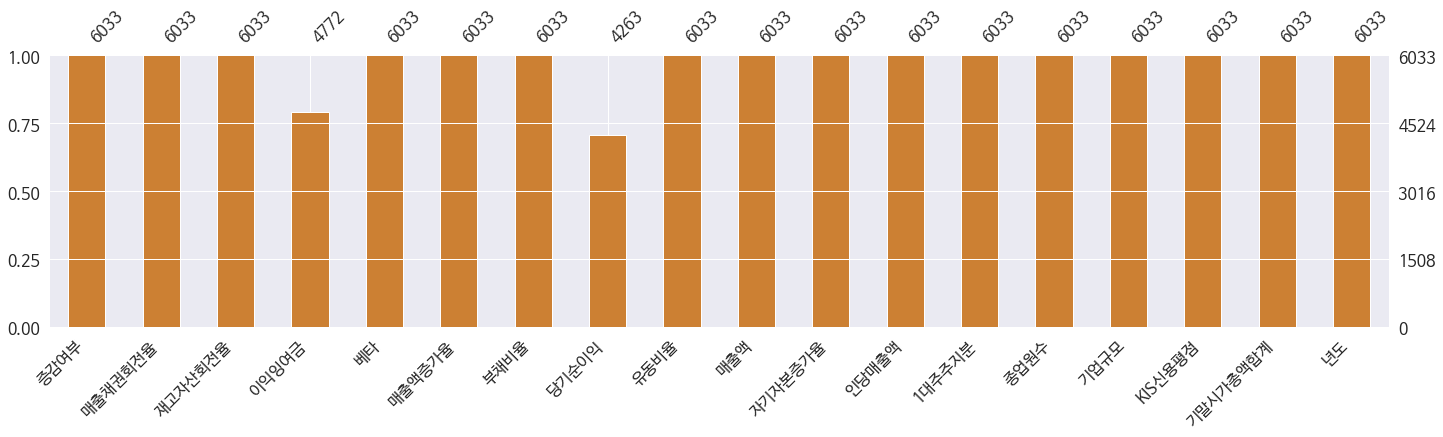

In [ ]:
for col in concat.columns:
  msg = 'column: {:>30}\t Percent of NaN value: {:.2f}%'.format(
      col, 100*(concat[col].isnull().sum() /concat[col].shape[0]))
  print(msg)
print()

import missingno as msno
msno.bar(concat, figsize=(24,5),
         color=(0.8, 0.5, 0.2))
plt.show()

모델별 mse 표준편차
SimpleImputer     mean                   0.007775
                  median                 0.007198
IterativeImputer  BayesianRidge          0.008175
                  LGBMRegressor          0.012008
                  ExtraTreesRegressor    0.010195
                  KNeighborsRegressor    0.009727
dtype: float64



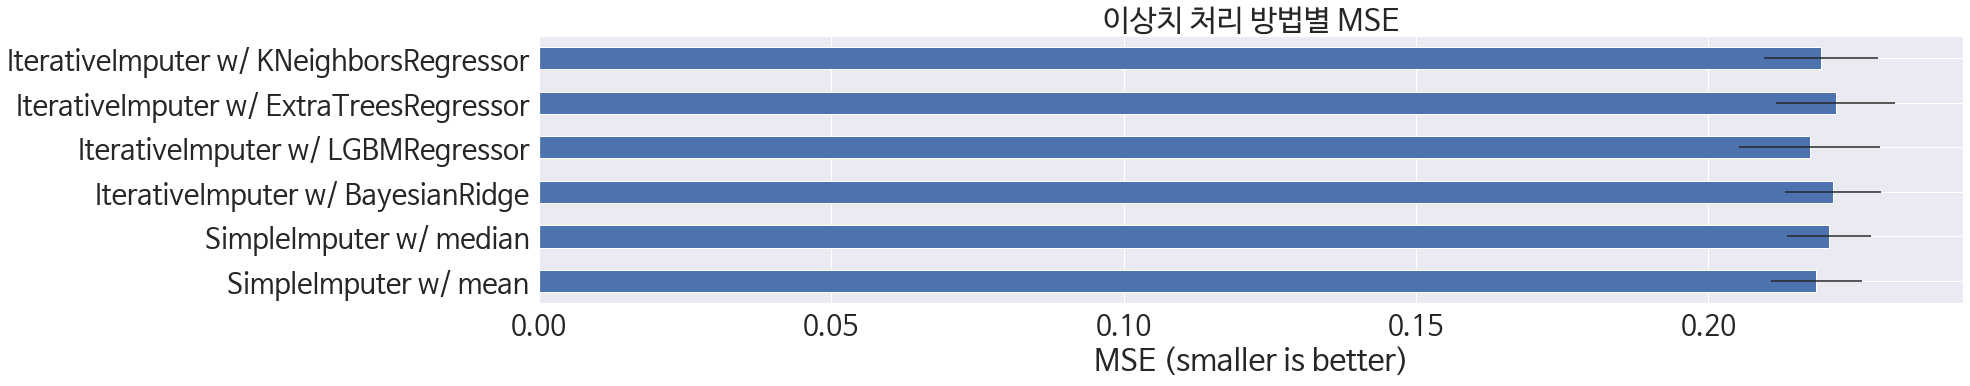

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import BayesianRidge
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

N_SPLITS = 5

X_missing = np.array(concat.drop(['증감여부'], axis=1))
y_missing = np.array(concat['증감여부'])
n_samples, n_features = X_missing.shape

br_estimator = RandomForestClassifier(n_estimators=300, random_state=1)

# 평균 및 중앙값을 통한 결측치 제거
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# 모델링을 통한 결측치 제거
estimators = [
    BayesianRidge(),
    LGBMRegressor(n_estimators=100, random_state=0),
    ExtraTreesRegressor(n_estimators=100, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

# simple_imputer와 iterative_imputer의 mse concat
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)

# 플롯 mse 평균 plot
fig, ax = plt.subplots(figsize=(28, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
print(f'모델별 mse 표준편차\n{errors}', end='\n\n') # 모델별 mse의 표준편차
ax.set_title('이상치 처리 방법별 MSE')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [ ]:
lgbm = LGBMRegressor(n_estimators=500, random_state=0)
imputer = IterativeImputer(random_state=0, estimator=lgbm)
clean_array = imputer.fit_transform(concat.values)
clean = pd.DataFrame(clean_array, columns=concat.columns)
print(clean.info())
clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   증감여부      6033 non-null   float64
 1   매출채권회전율   6033 non-null   float64
 2   재고자산회전율   6033 non-null   float64
 3   이익잉여금     6033 non-null   float64
 4   베타        6033 non-null   float64
 5   매출액증가율    6033 non-null   float64
 6   부채비율      6033 non-null   float64
 7   당기순이익     6033 non-null   float64
 8   유동비율      6033 non-null   float64
 9   매출액       6033 non-null   float64
 10  자기자본증가율   6033 non-null   float64
 11  인당매출액     6033 non-null   float64
 12  1대주주지분    6033 non-null   float64
 13  종업원수      6033 non-null   float64
 14  기업규모      6033 non-null   float64
 15  KIS신용평점   6033 non-null   float64
 16  기말시가총액합계  6033 non-null   float64
 17  년도        6033 non-null   float64
dtypes: float64(18)
memory usage: 848.5 KB
None


,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
0,0.0,2.61,4.61,10.055718,1.6834,1.68,63.82,8.805433,127.55,10.615616,1.42,8.334582,21.57,236.0,0.0,6.0,11.023434,2016.0
1,0.0,4.05,13.37,10.714028,0.5174,5.33,139.68,9.664454,56.81,11.138139,4.12,8.596560,20.02,52.0,1.0,7.0,10.650312,2016.0
2,0.0,8.41,5.13,10.319530,0.6606,-0.72,22.74,9.652713,433.98,10.488569,15.61,8.339350,32.02,130.0,0.0,2.0,10.686314,2016.0
3,0.0,1.84,5.81,9.986135,1.0309,-30.22,167.25,9.429803,161.66,10.547415,-60.44,8.530382,14.79,112.0,0.0,9.0,10.944346,2016.0
4,0.0,0.35,0.91,11.781689,1.2331,1571.61,0.87,11.704208,742.97,10.031039,100.39,8.231699,41.27,160.0,1.0,3.0,11.522892,2016.0


## EDA

### 1. 기본 통계치 확인

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
clean.describe()

,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
count,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00,6033.00
mean,0.25,11.90,270.33,10.60,0.84,28.18,91.47,9.71,2950.52,10.17,42.68,8.66,29.18,518.67,0.51,4.90,11.20,2017.00
std,0.43,227.14,7454.94,0.72,0.46,545.31,192.97,0.69,165028.76,1.24,1470.81,0.42,15.84,1367.83,0.50,1.91,0.55,0.81
min,0.00,0.01,0.01,6.59,0.00,-100.00,0.05,6.50,0.29,6.29,-97.27,4.51,1.08,0.00,0.00,1.00,9.68,2016.00
25%,0.00,3.41,5.73,10.09,0.55,-6.81,24.97,9.24,102.10,8.89,-0.31,8.42,17.69,85.00,0.00,3.00,10.81,2016.00
50%,0.00,5.14,10.61,10.59,0.80,4.04,57.80,9.66,173.51,10.49,5.56,8.66,26.56,184.00,1.00,5.00,11.10,2017.00
75%,0.00,8.06,39.44,11.05,1.07,17.63,105.20,10.14,341.28,11.12,18.28,8.91,37.69,408.00,1.00,6.00,11.53,2018.00
max,1.00,17302.76,540841.16,13.20,13.39,30514.47,6221.91,12.55,12714894.87,13.21,113585.48,10.83,100.00,25797.00,1.00,10.00,13.30,2018.00


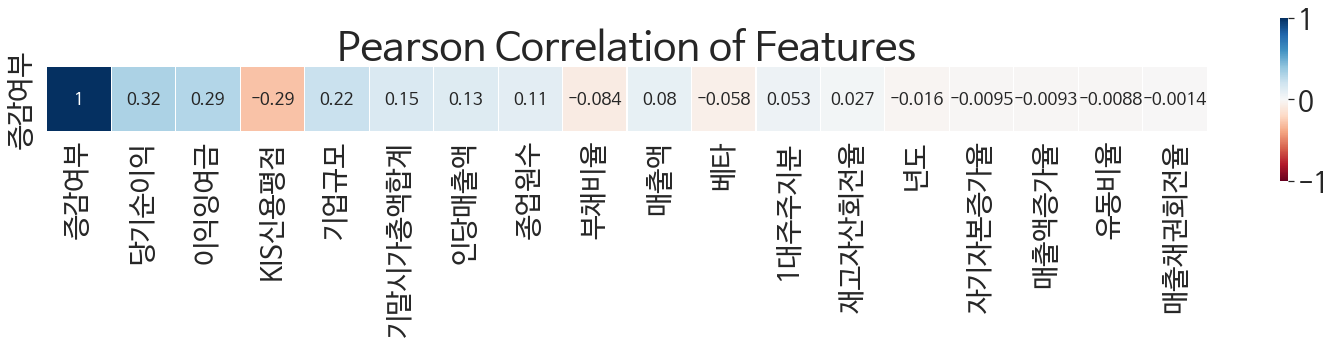

In [ ]:
order = clean.corr()[['증감여부']].abs().sort_values('증감여부', ascending=False).index
heatmap_data = clean.corr()[['증감여부']].loc[order,:].T
colormap = plt.cm.RdBu
plt.figure(figsize=(26, 3))
plt.title('Pearson Correlation of Features', y=1.03, size=40)
sns.heatmap(heatmap_data.astype(float), linewidths=0.1, vmin=-1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 17})
plt.show()

### 2. 범주형 특성 및 이산형 특성 EDA
- 증감여부
- 기업규모
- KIS신용평점
- 년도
- 종업원수

In [ ]:
clean_type = clean.astype({'증감여부':int, '기업규모':int, '년도':int, '종업원수':int, 'KIS신용평점':int})
clean_type

,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
0,0,2.61,4.61,10.06,1.68,1.68,63.82,8.81,127.55,10.62,1.42,8.33,21.57,236,0,6,11.02,2016
1,0,4.05,13.37,10.71,0.52,5.33,139.68,9.66,56.81,11.14,4.12,8.60,20.02,52,1,7,10.65,2016
2,0,8.41,5.13,10.32,0.66,-0.72,22.74,9.65,433.98,10.49,15.61,8.34,32.02,130,0,2,10.69,2016
3,0,1.84,5.81,9.99,1.03,-30.22,167.25,9.43,161.66,10.55,-60.44,8.53,14.79,112,0,9,10.94,2016
4,0,0.35,0.91,11.78,1.23,1571.61,0.87,11.70,742.97,10.03,100.39,8.23,41.27,160,1,3,11.52,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,0,8.81,33.83,9.69,0.74,54.78,337.21,9.61,159.83,9.99,-75.39,8.25,53.97,55,0,7,11.85,2018
6029,1,6.35,20.10,10.90,0.69,9.85,105.69,10.33,139.05,11.56,8.00,8.92,52.82,478,1,5,11.38,2018
6030,1,4.97,11.16,10.63,2.06,1.79,31.69,10.10,227.53,11.40,7.09,8.78,37.69,398,1,3,11.20,2018
6031,0,12.49,8.70,10.02,0.63,46.85,208.78,9.71,208.80,10.82,-25.76,8.82,53.11,100,0,5,11.85,2018


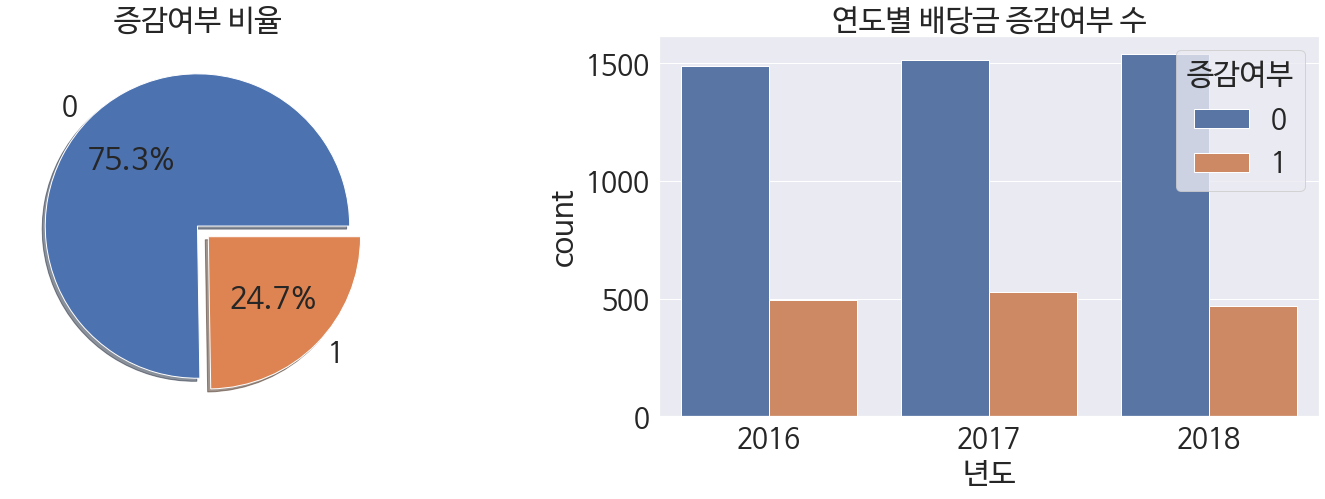

In [ ]:
plt.rc('font', size=30)

f, ax = plt.subplots(1, 2, figsize=(26, 7))

clean_type['증감여부'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('증감여부 비율')
ax[0].set_ylabel('')

sns.countplot('년도', hue='증감여부', data=clean_type, ax=ax[1])
ax[1].set_title('연도별 배당금 증감여부 수')

plt.show()

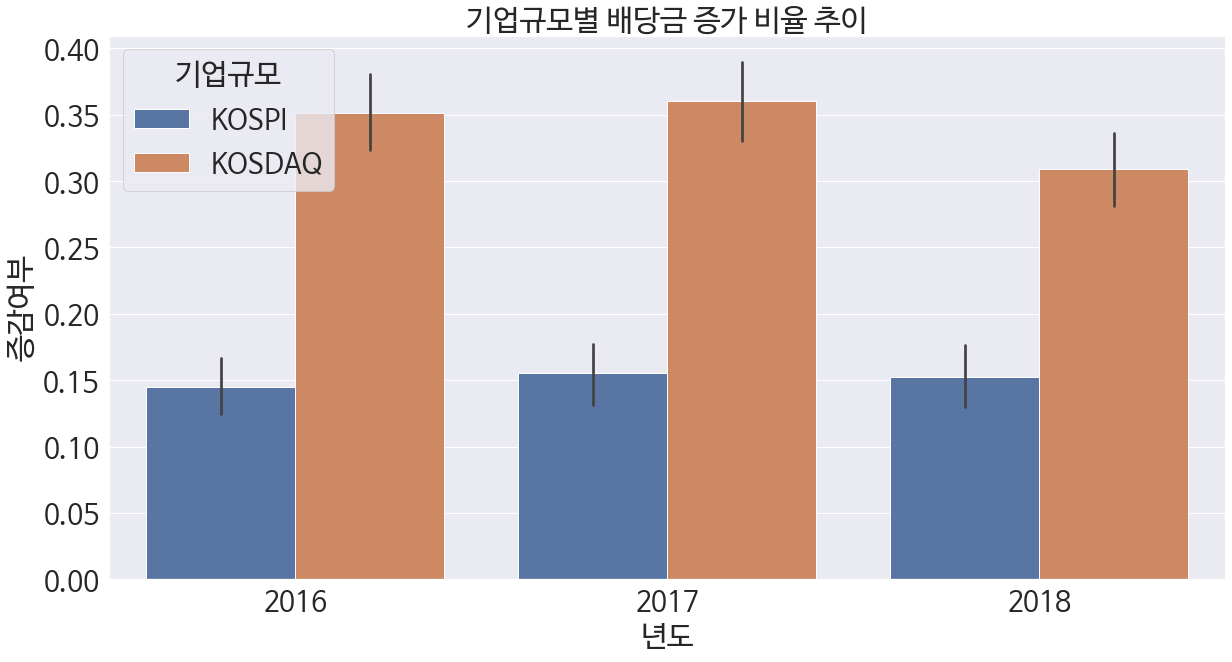

In [ ]:
clean_type_named = clean_type.copy()

clean_type_named.loc[clean_type.기업규모==0, '기업규모'] = 'KOSPI'
clean_type_named.loc[clean_type.기업규모==1, '기업규모'] = 'KOSDAQ'

plt.figure(figsize=(20,10))
sns.barplot(data=clean_type_named,
            x="년도",
            y="증감여부",
            hue="기업규모")
plt.title('기업규모별 배당금 증가 비율 추이')
plt.show()

년도_기업규모_증감여부 = pd.pivot_table(clean_type_named, index='증감여부', columns=['년도', '기업규모'], aggfunc='count').베타
년도_기업규모_증감여부.style.background_gradient(cmap='autumn_r', vmin=100, vmax=900)

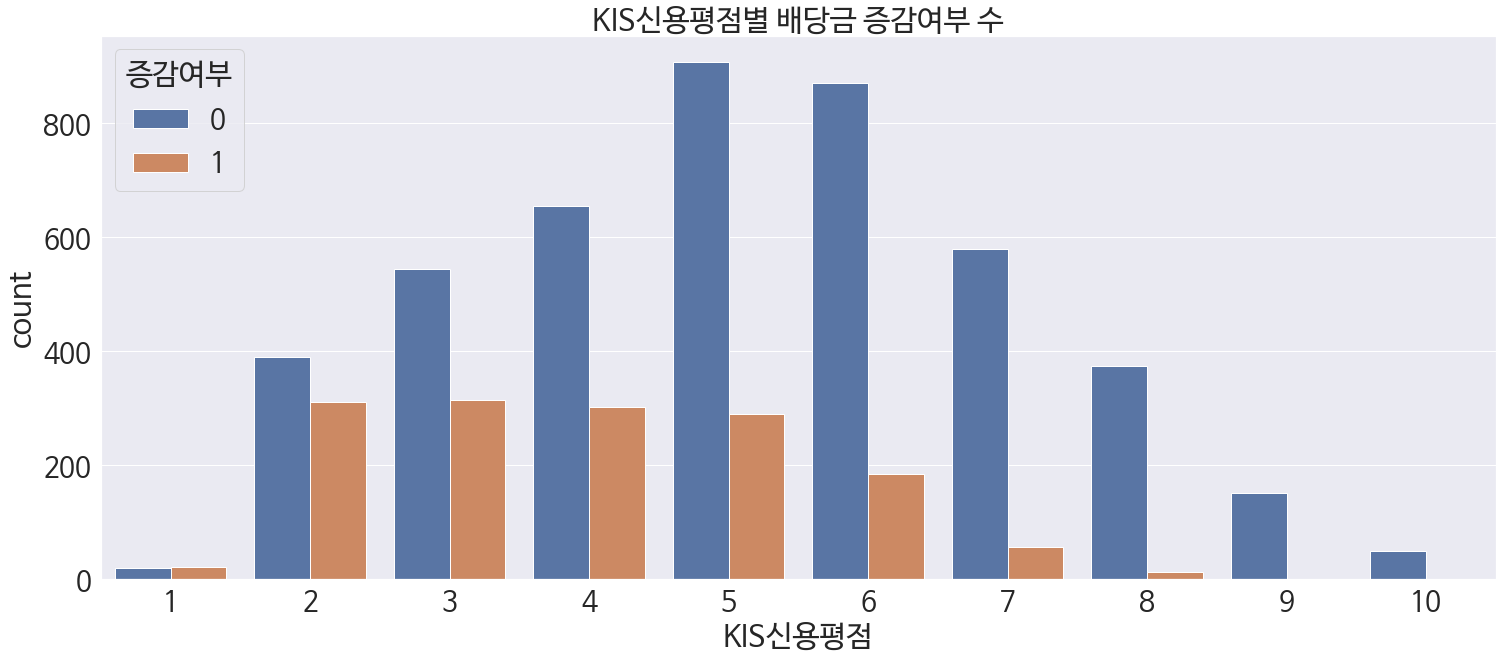

In [ ]:
plt.figure(figsize=(25,10))

sns.countplot('KIS신용평점', hue='증감여부', data=clean_type)
plt.title('KIS신용평점별 배당금 증감여부 수')

plt.show()

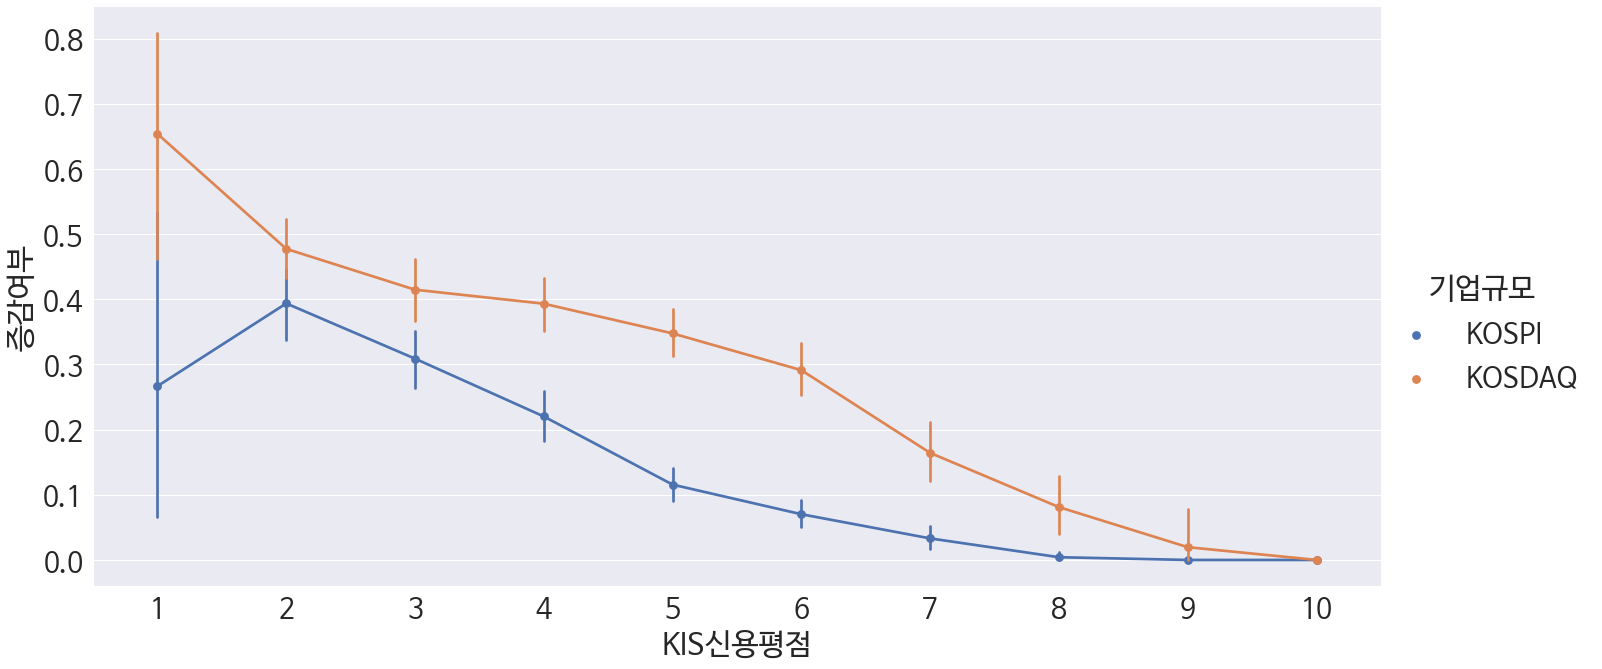

In [ ]:
sns.factorplot('KIS신용평점', '증감여부', hue='기업규모', data=clean_type_named,
               size=10, aspect=2.0)
plt.show()

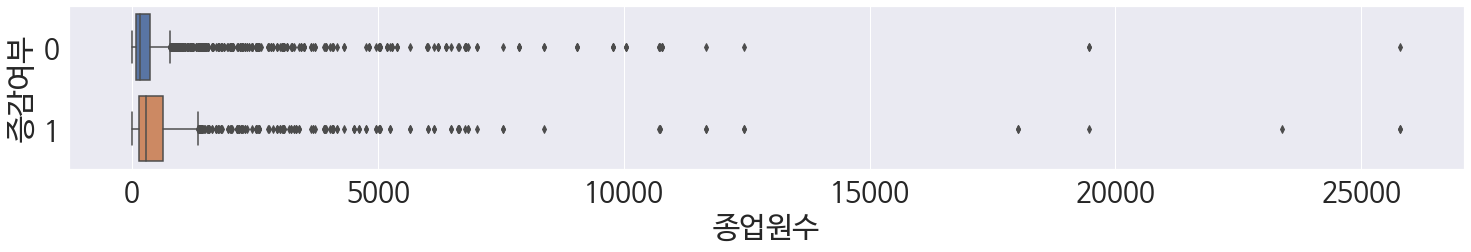

In [ ]:
clean_type_named.증감여부 = clean_type_named.증감여부.astype('str')

plt.figure(figsize = (25, 3))

sns.boxplot(x = '종업원수',y='증감여부', data = clean_type_named)

plt.show()

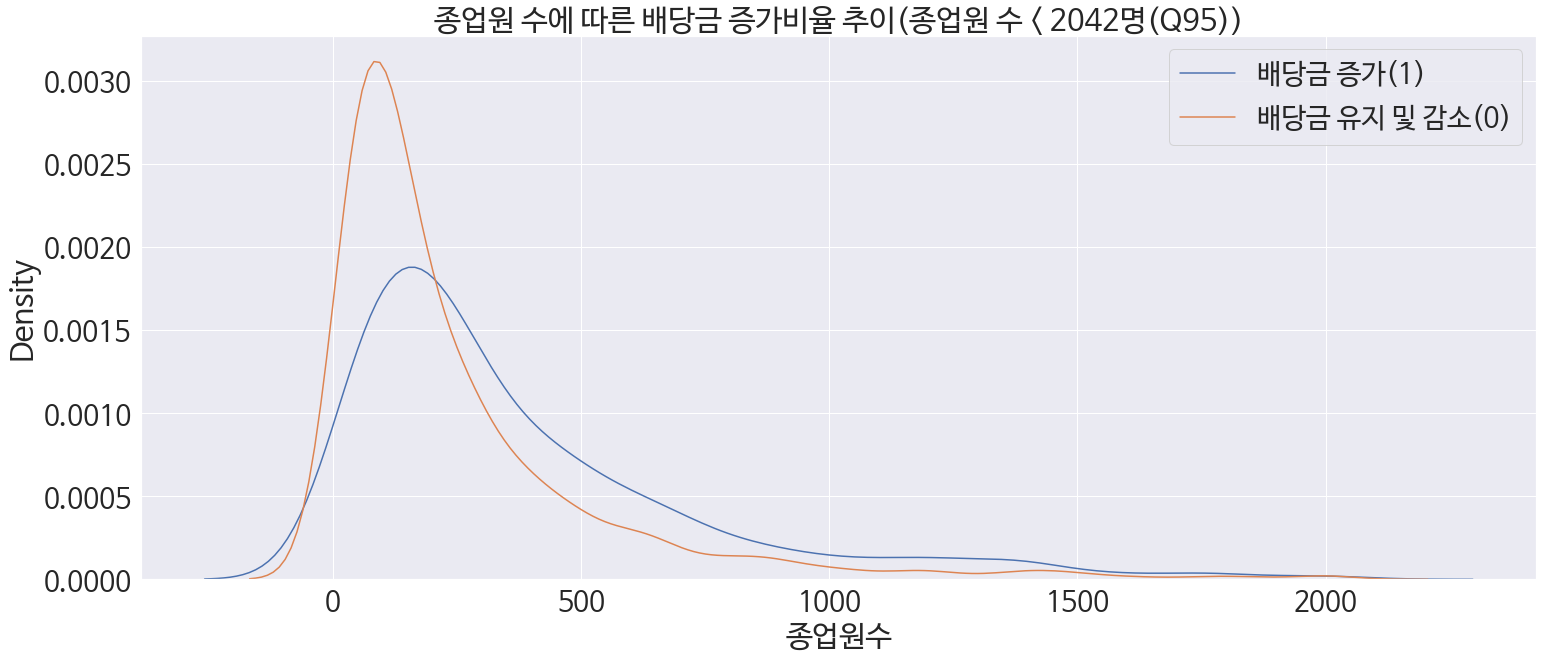

In [ ]:
k=0.95
q = clean_type.종업원수.quantile(k)
clean_cutting = clean_type.loc[clean_type.종업원수<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,'종업원수'])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,'종업원수'])

plt.title(f'종업원 수에 따른 배당금 증가비율 추이(종업원 수 < {int(q)}명(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])
plt.show()

### 3. 연속형 특성 EDA
- 매출채권회전율
- 재고자산회전율
- 이익잉여금
- 베타
- 매출액증가율
- 부채비율
- 당기순이익
- 유동비율
- 매출액
- 자기자본증가율
- 인당매출액
- 1대주주지분
- 종업원수(이산형 특성이나 연속형으로서 EDA)
- 기말시가총액합계

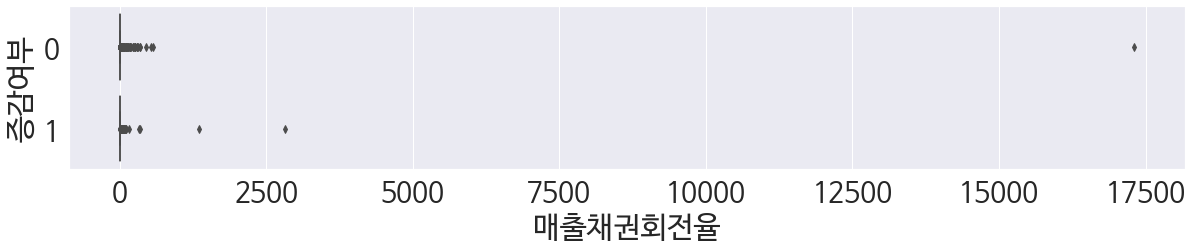

In [ ]:
plt.figure(figsize=(20,3))
sns.boxplot(x = '매출채권회전율',y='증감여부', data = clean_type_named)
plt.show()

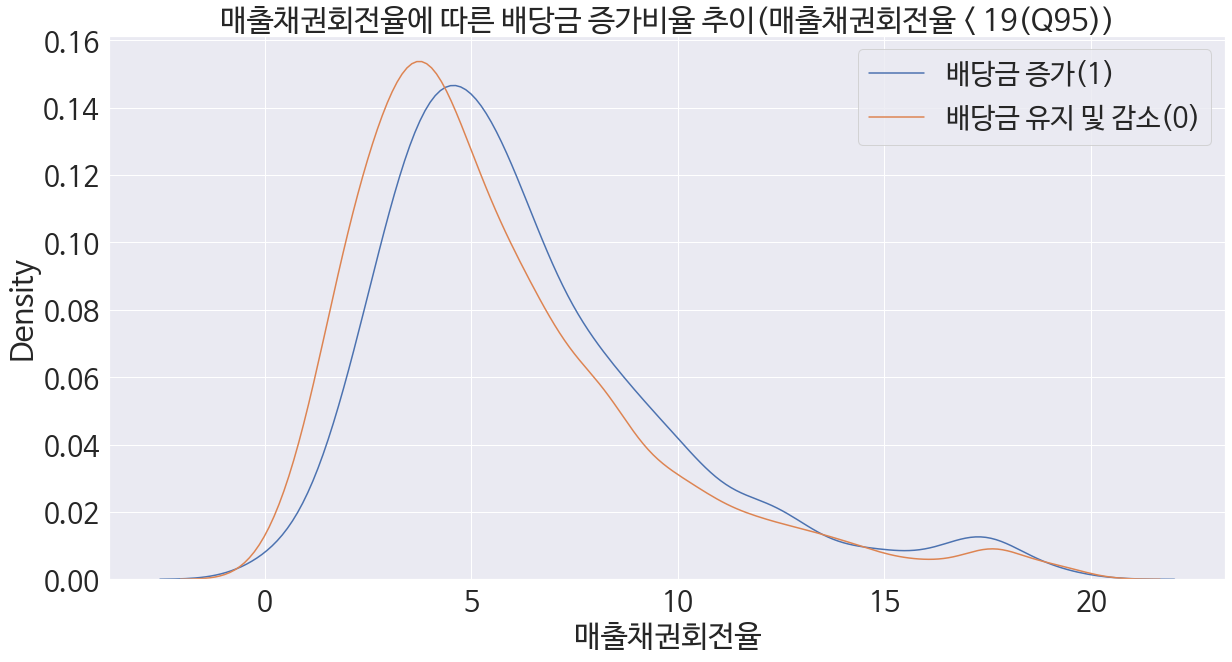

In [ ]:
k=0.95
q = clean_type['매출채권회전율'].quantile(k)
clean_cutting = clean_type.loc[clean_type.매출채권회전율<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,'매출채권회전율'])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,'매출채권회전율'])

plt.title(f'매출채권회전율에 따른 배당금 증가비율 추이(매출채권회전율 < {int(q)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

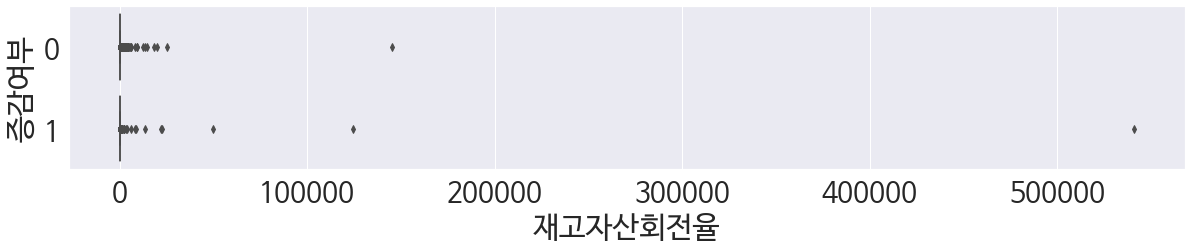

In [ ]:
col = clean_type.columns[2]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

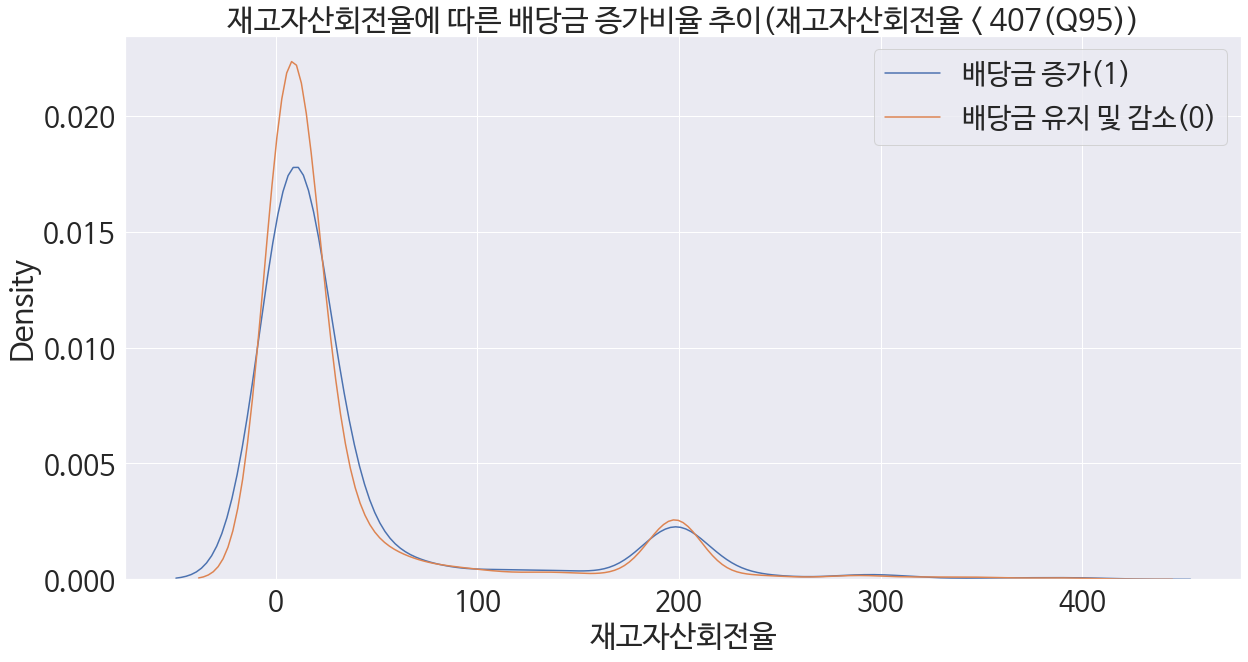

In [ ]:
k=0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {int(q)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

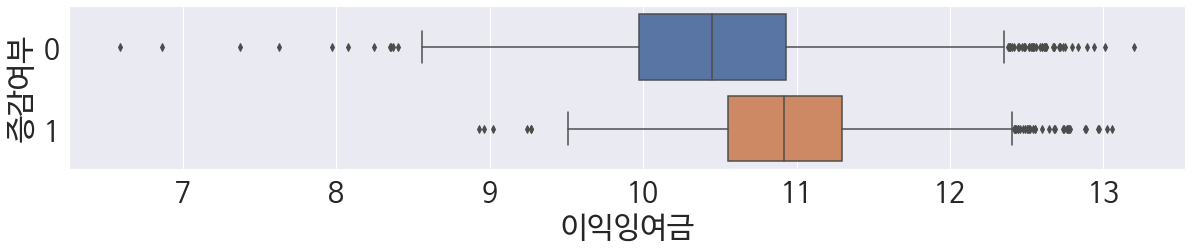

In [ ]:
col = clean_type.columns[3]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

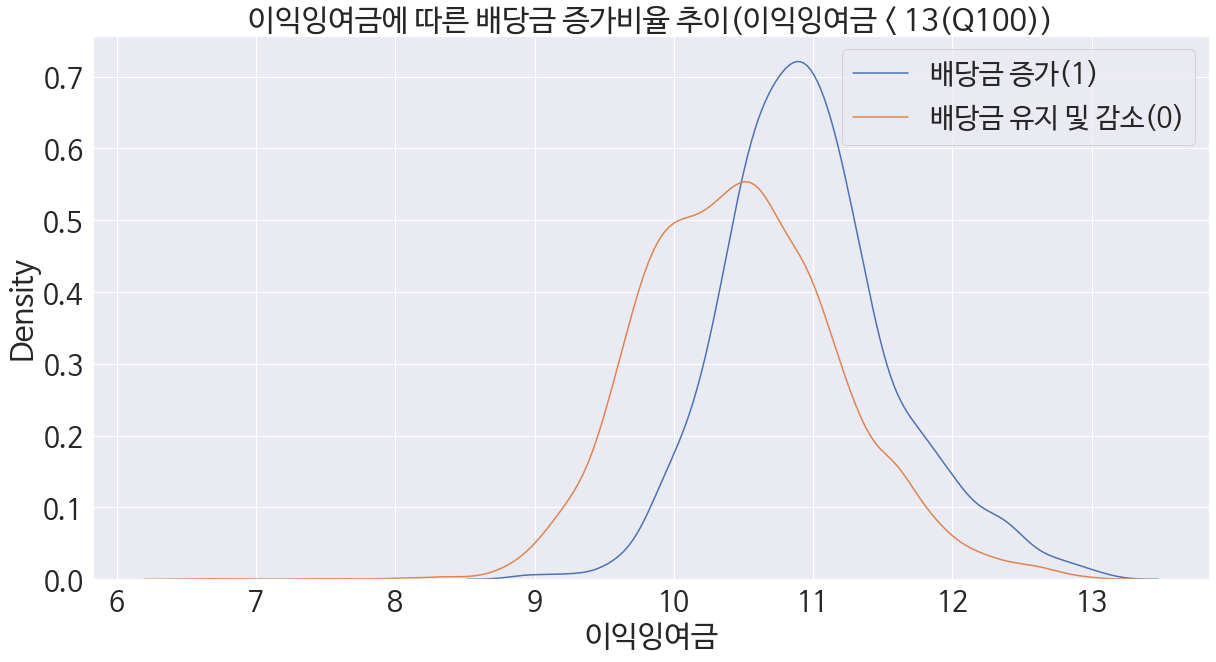

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {int(q)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

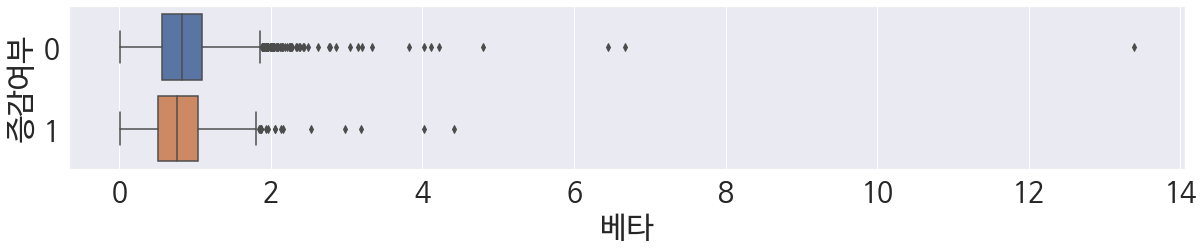

In [ ]:
col = clean_type.columns[4]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

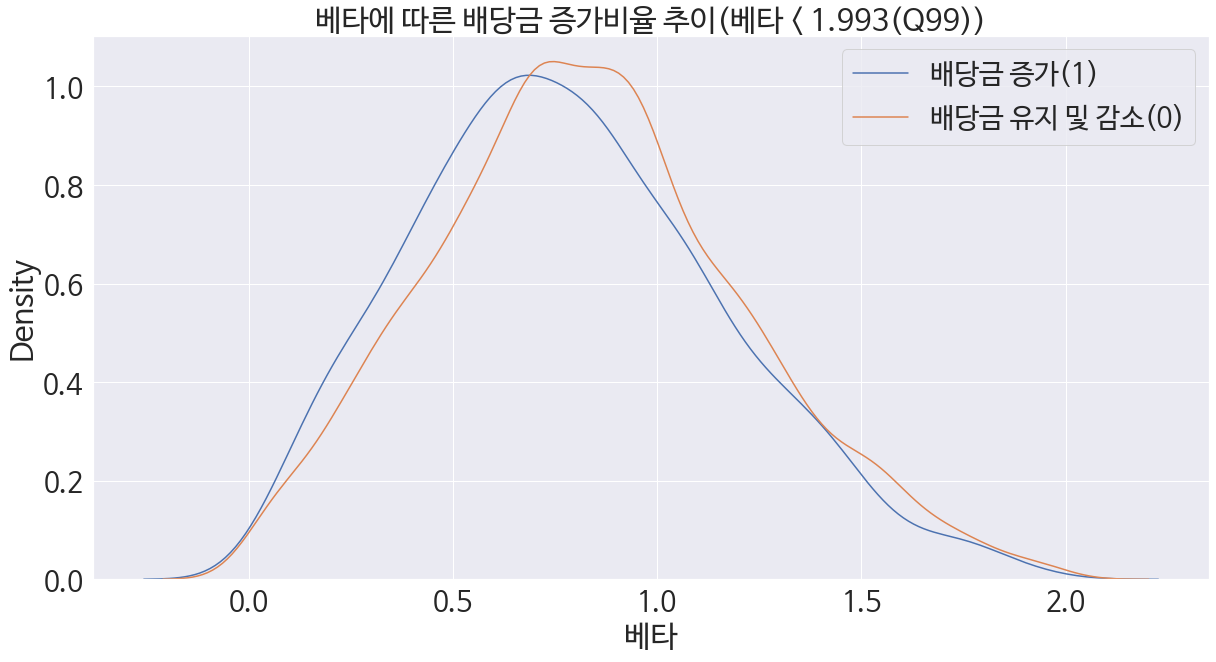

In [ ]:
k = 0.99
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

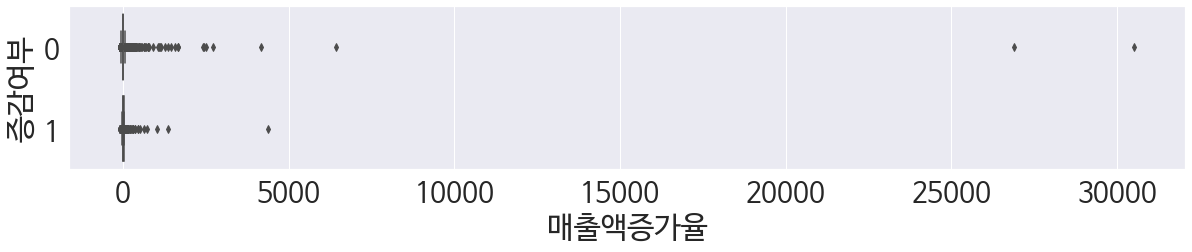

In [ ]:
col = clean_type.columns[5]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

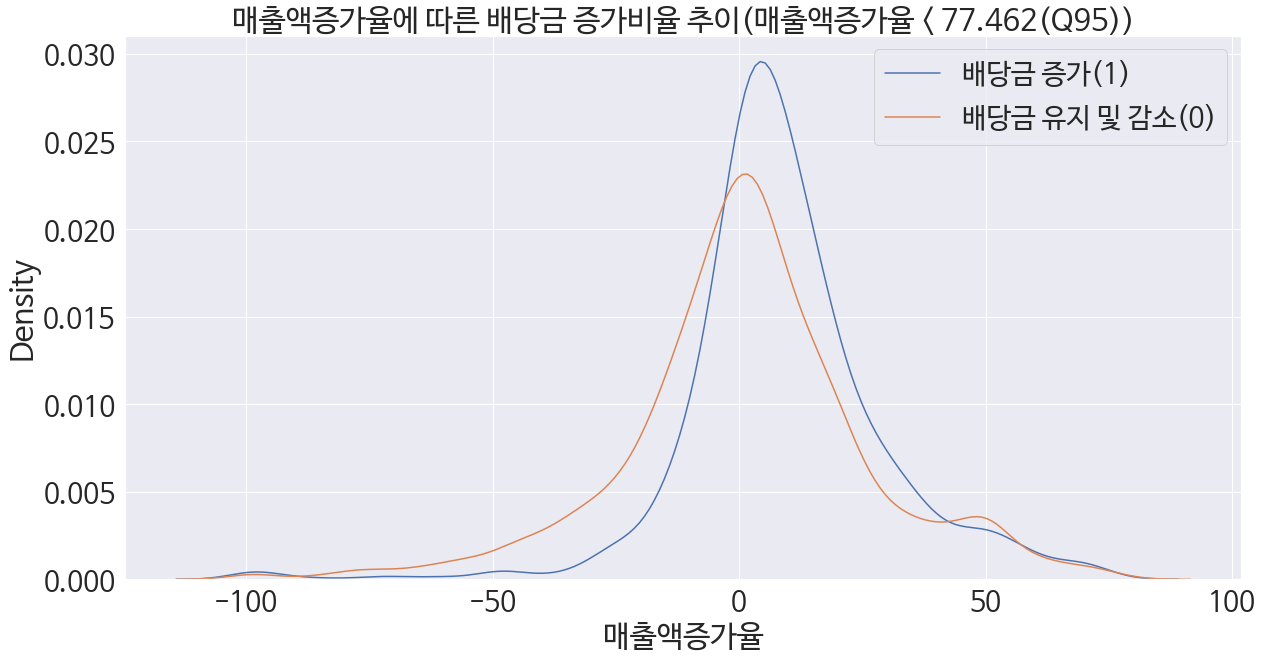

In [ ]:
k = 0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

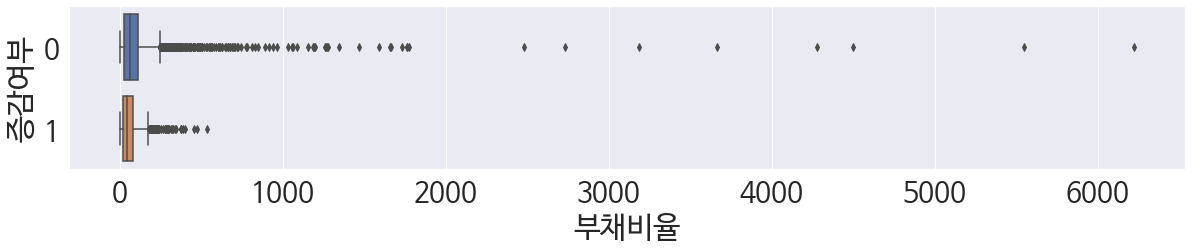

In [ ]:
col = clean_type.columns[6]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

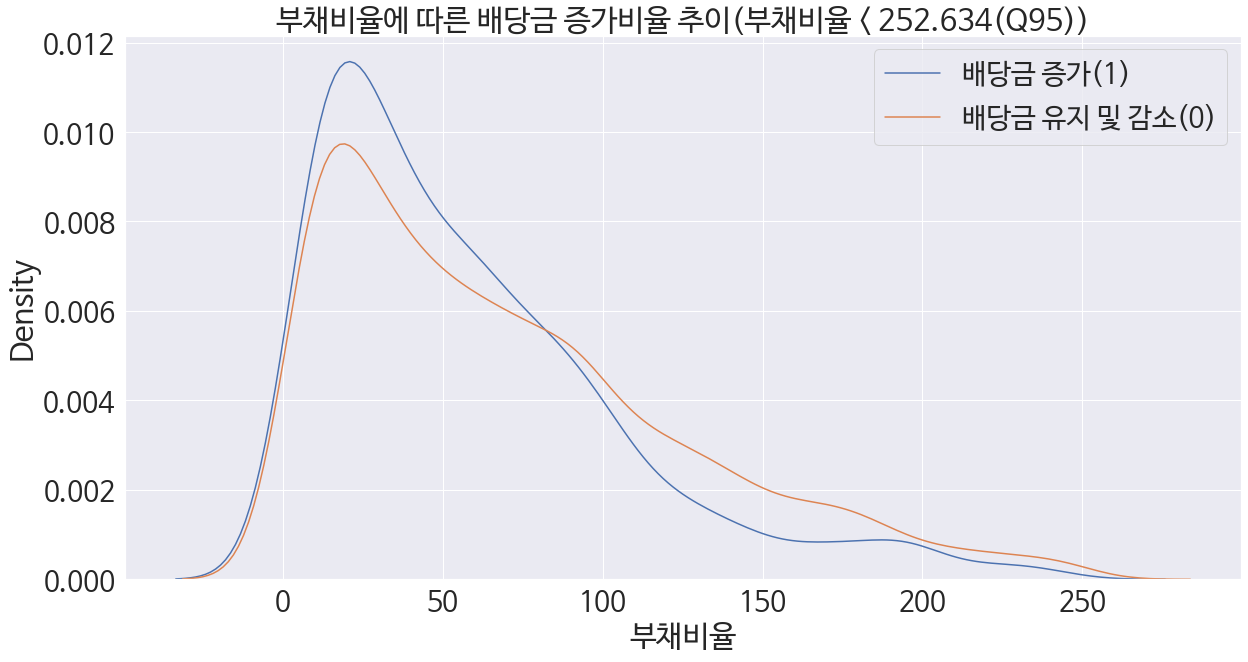

In [ ]:
k = 0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

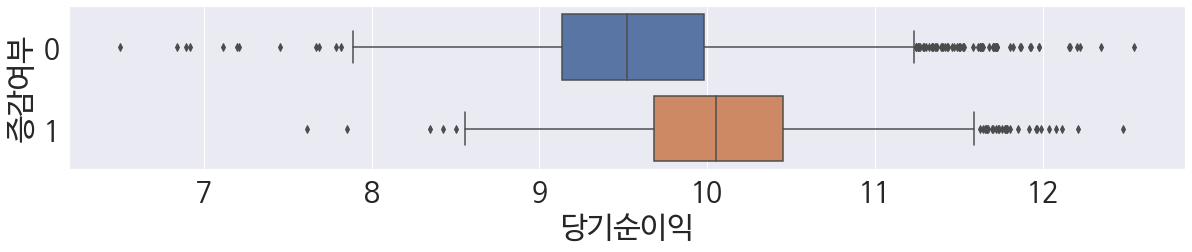

In [ ]:
col = clean_type.columns[7]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

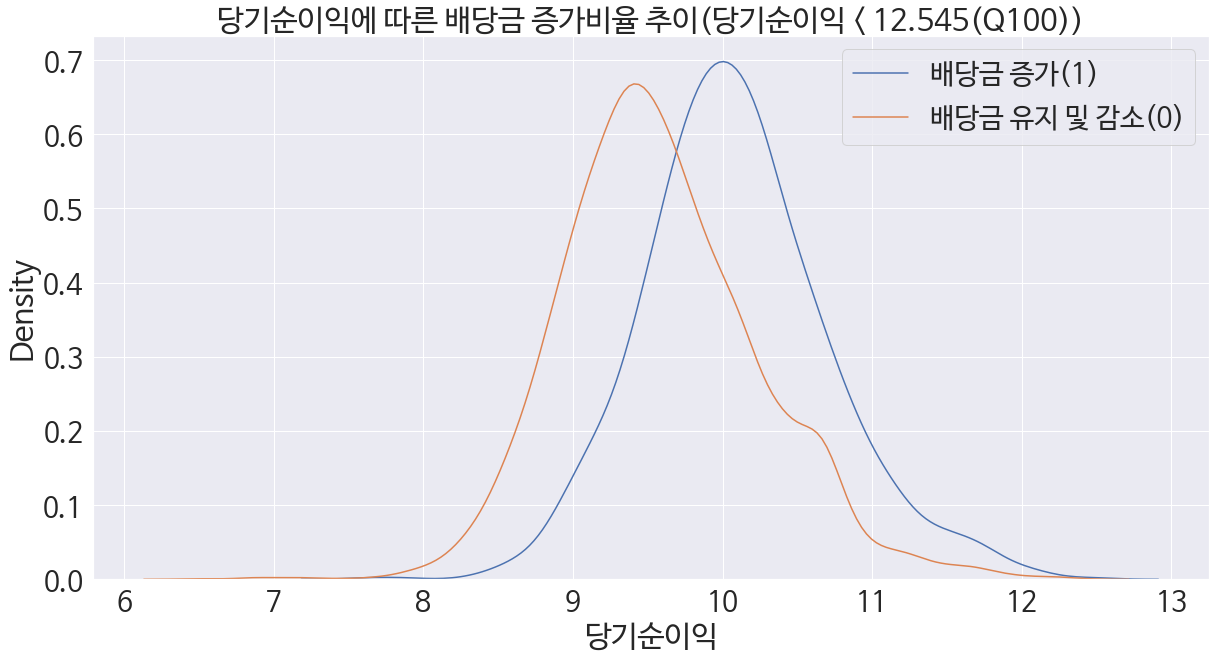

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

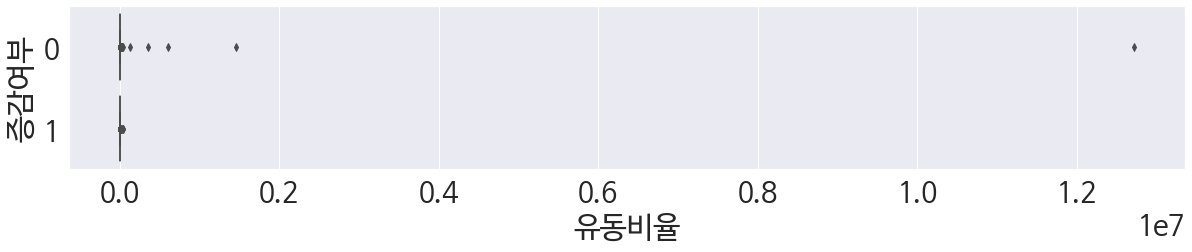

In [ ]:
col = clean_type.columns[8]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

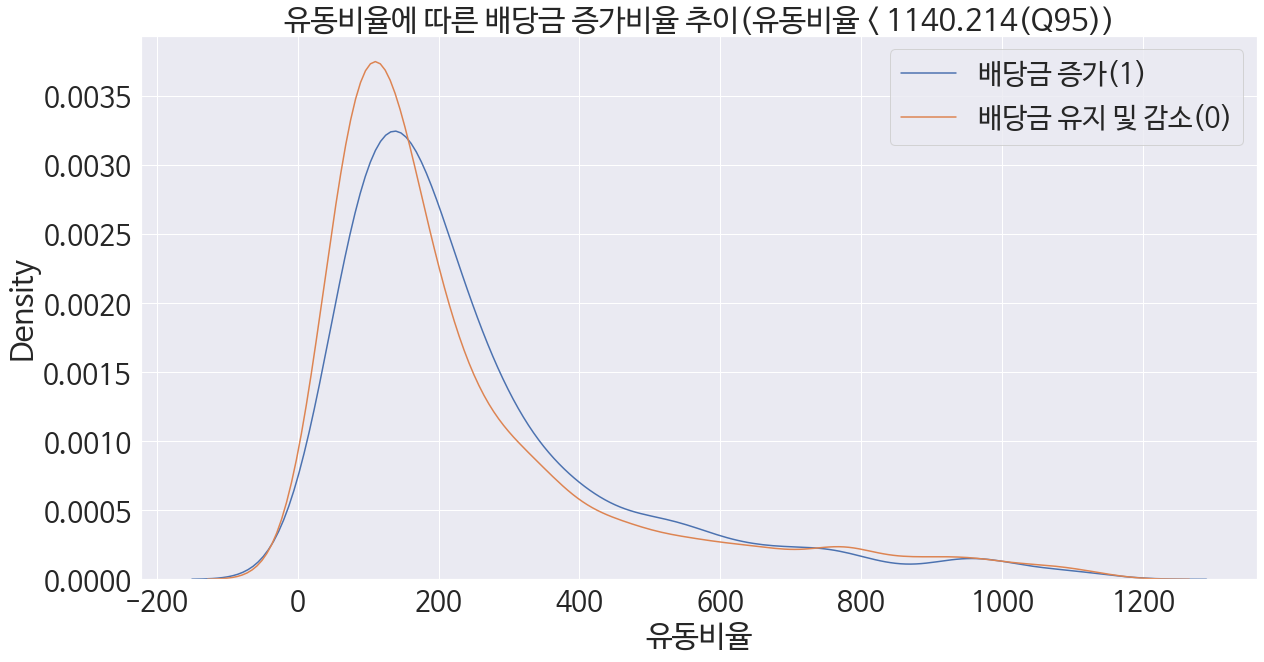

In [ ]:
k = 0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

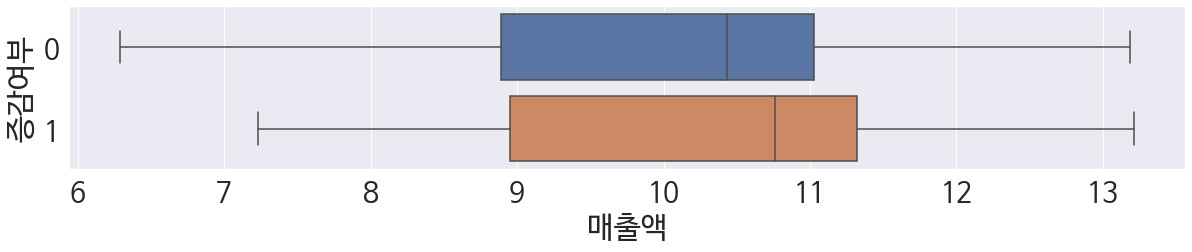

In [ ]:
col = clean_type.columns[9]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

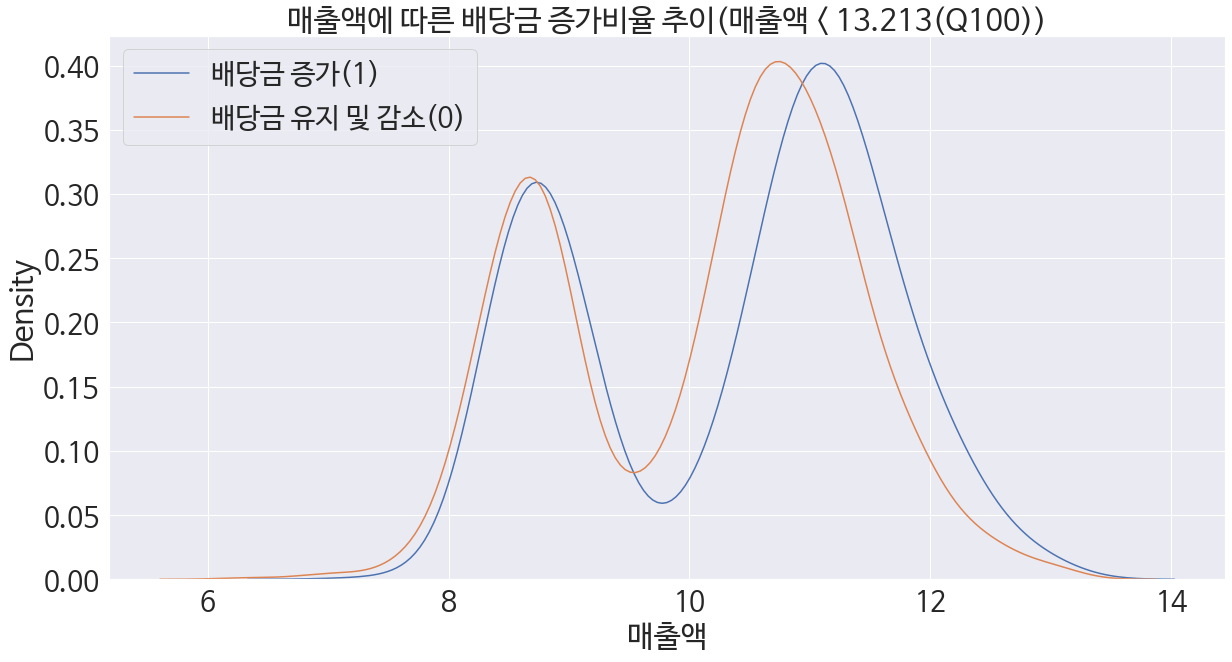

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

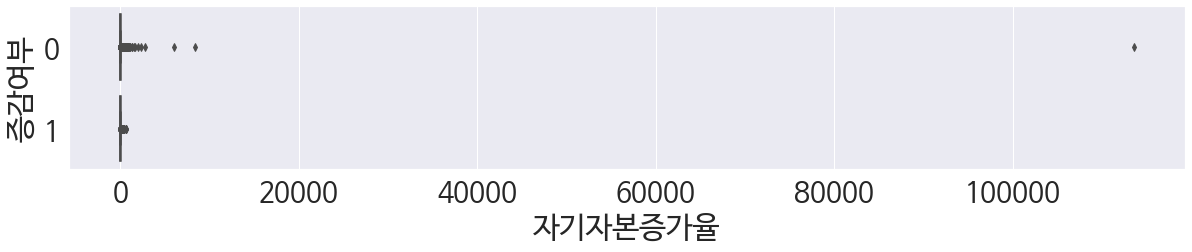

In [ ]:
col = clean_type.columns[10]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

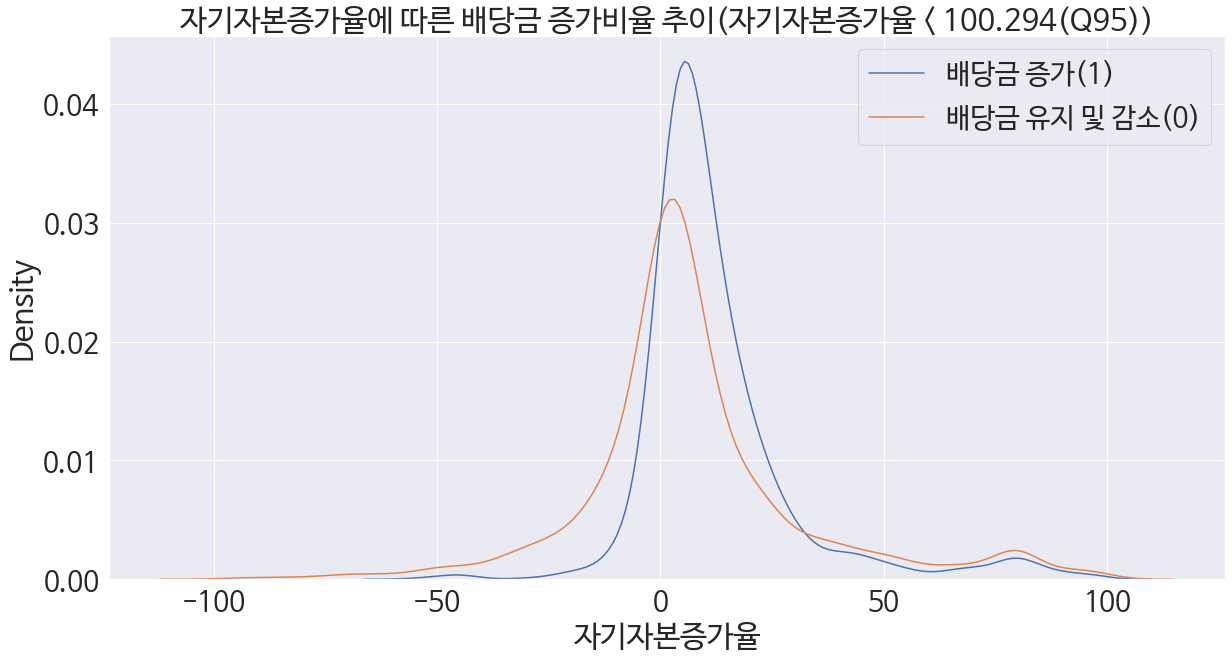

In [ ]:
k = 0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

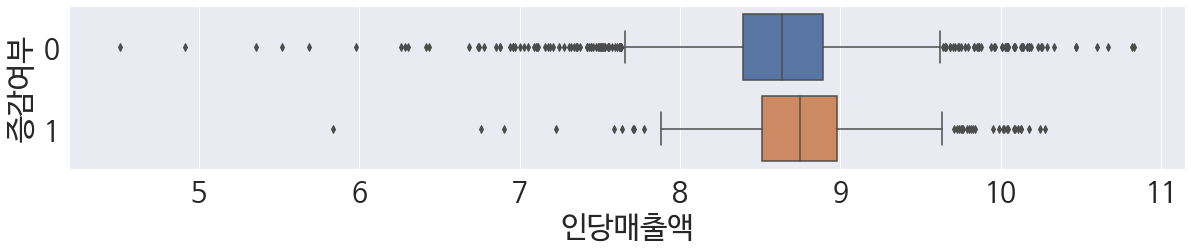

In [ ]:
col = clean_type.columns[11]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

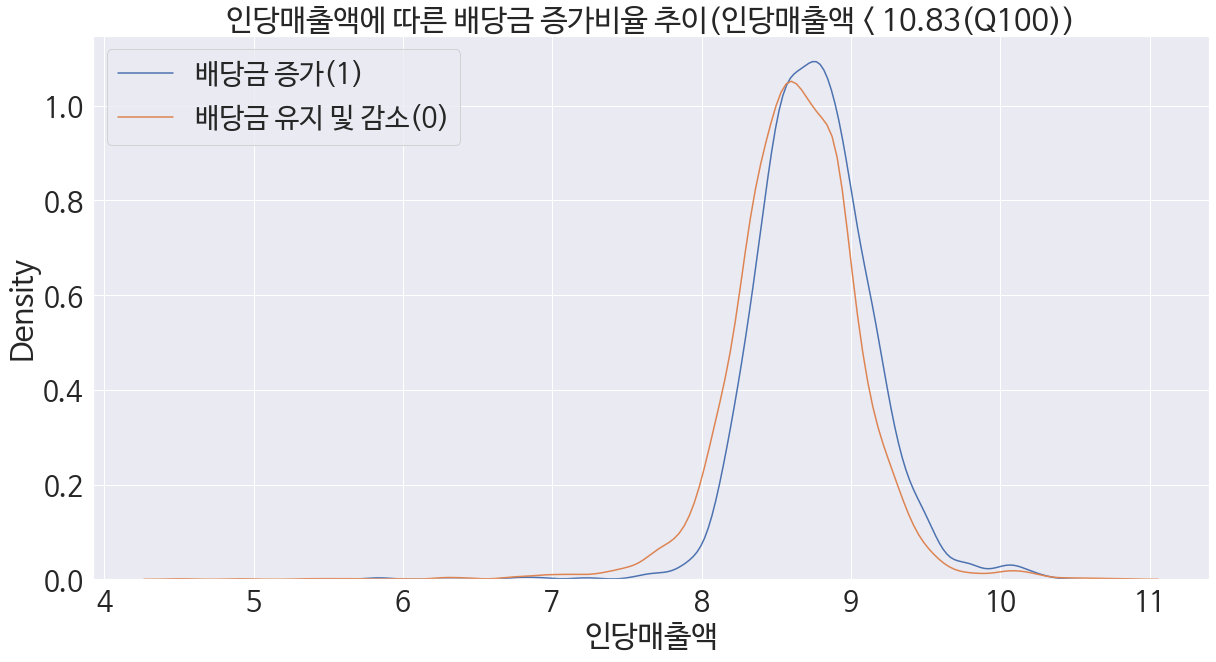

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

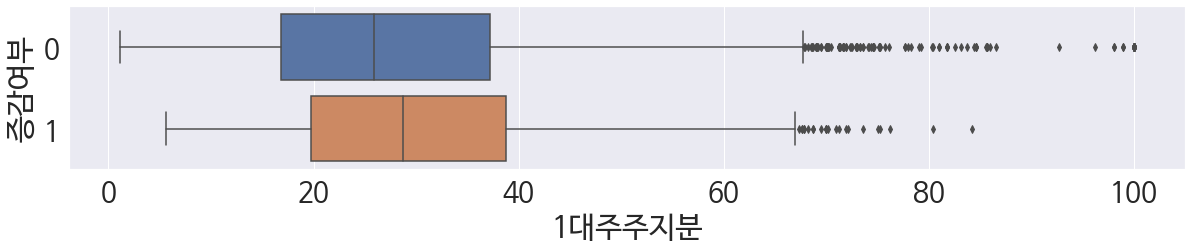

In [ ]:
col = clean_type.columns[12]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

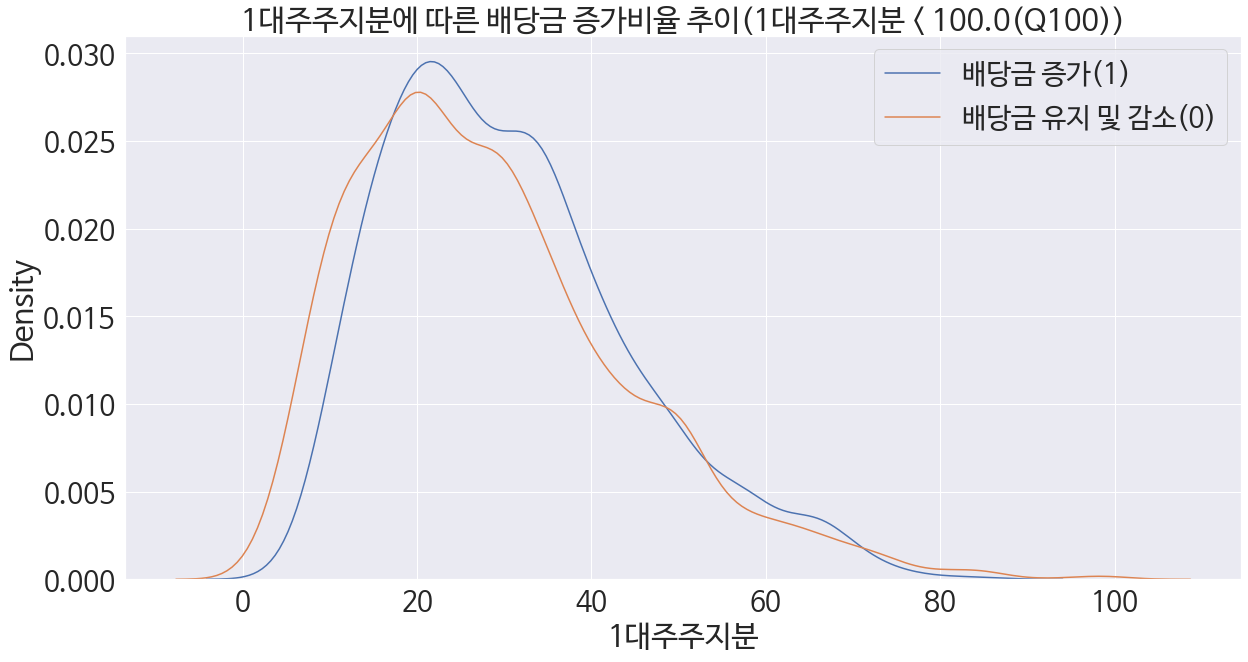

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

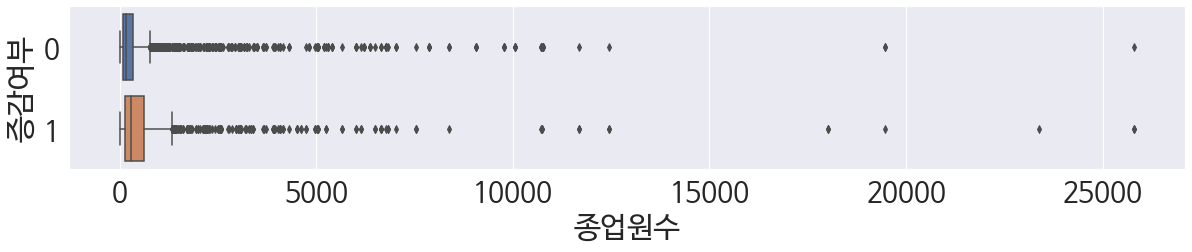

In [ ]:
col = clean_type.columns[13]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

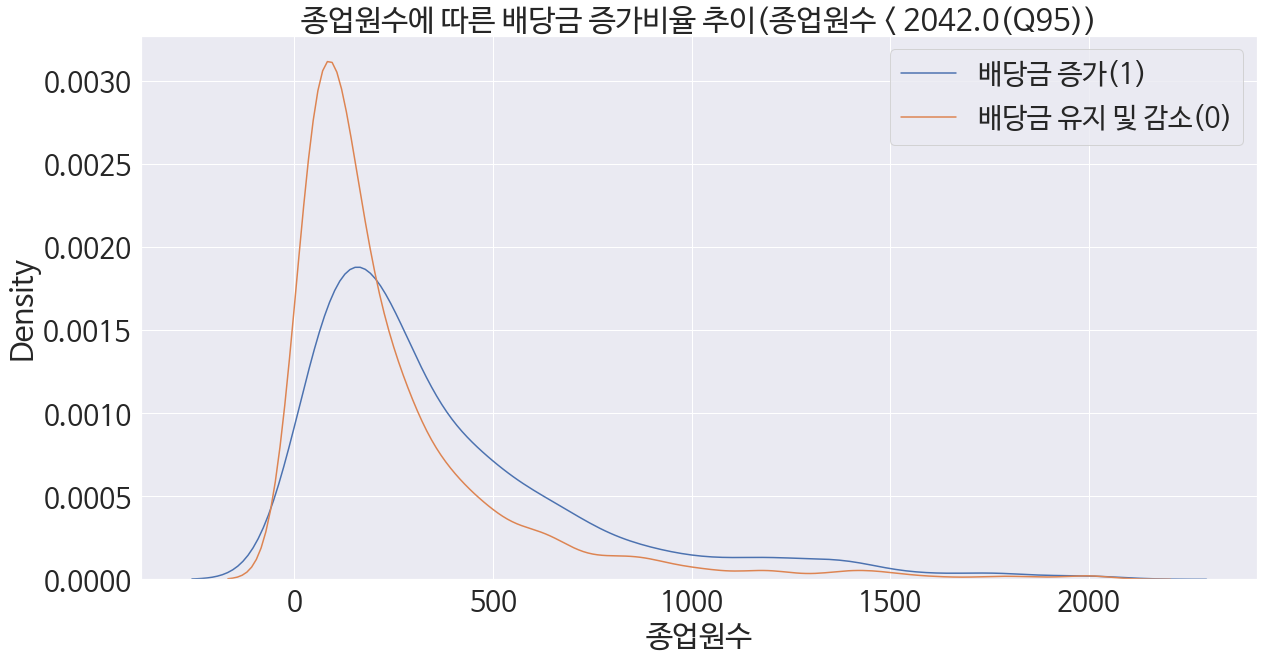

In [ ]:
k = 0.95
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

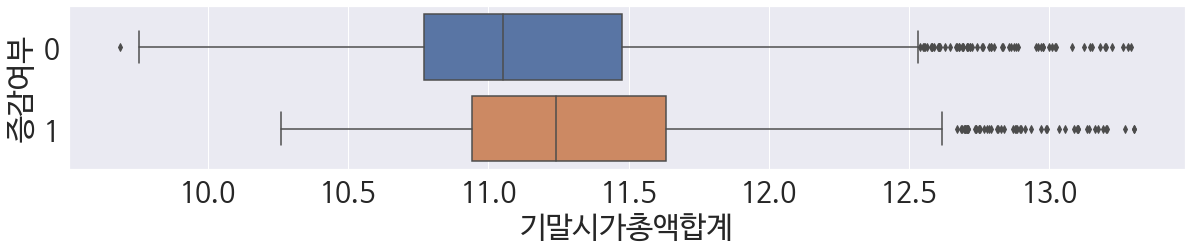

In [ ]:
col = clean_type.columns[16]

plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type_named)
plt.show()

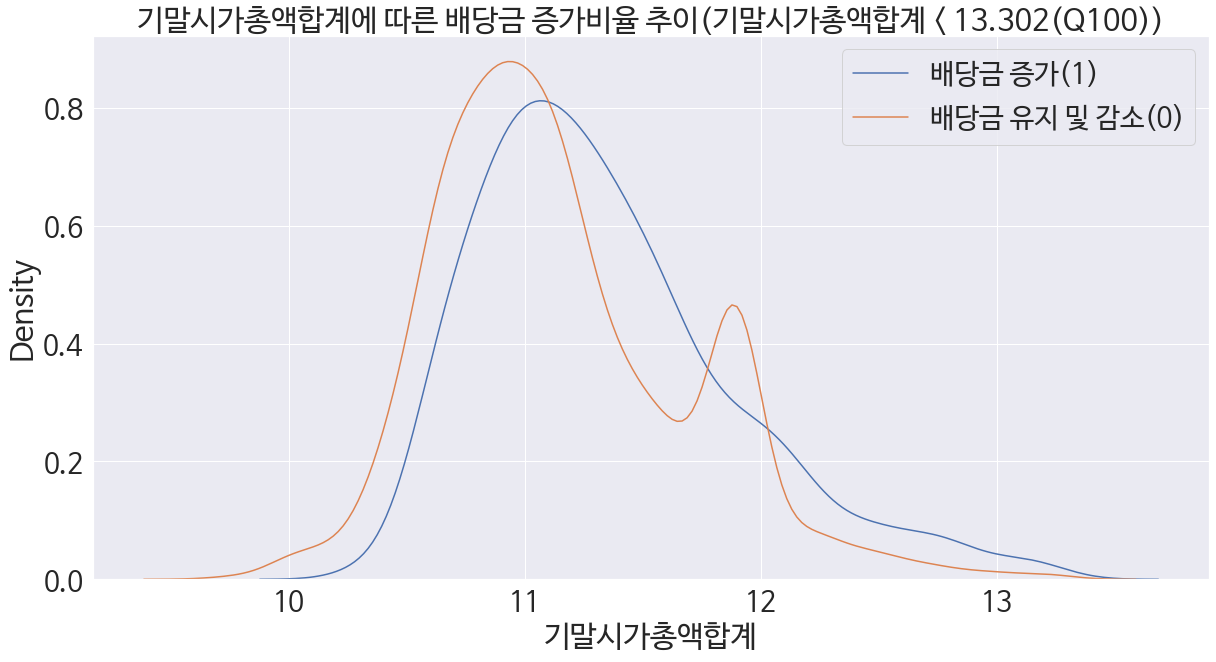

In [ ]:
k = 1.00
q = clean_type[col].quantile(k)
clean_cutting = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_cutting.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

## 이상치 처리

In [ ]:
# IsolationForest를 활용한 이상치 처리
from sklearn.ensemble import IsolationForest

In [ ]:
df = clean_type.copy()

# 이상치 감지하는 부분(중요) - comtamination 를 조절하여 이상치 처리하기
model=IsolationForest(n_estimators=10000, max_samples='auto', n_jobs=-1,
                      max_features=10, contamination=0.2)
# contamination 을 통해 결측치로 제거할 비율을 설정할 수 있음 (0.2이면 20% 제거)

model.fit(clean_type.to_numpy())

IsolationForest(contamination=0.2, max_features=10, n_estimators=10000,
                n_jobs=-1)

In [ ]:
score = model.decision_function(clean_type.to_numpy())
anomaly = model.predict(clean_type.to_numpy())
df['scores']= score
df['anomaly']= anomaly

anomaly_data = df.loc[df['anomaly']==-1] # 이상값은 -1으로 나타낸다.
anomaly_data # 이상치 데이터

,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도,scores,anomaly
4,0,0.35,0.91,11.78,1.23,1571.61,0.87,11.70,742.97,10.03,100.39,8.23,41.27,160,1,3,11.52,2016,-0.08,-1
5,1,3.30,3.29,12.74,0.29,5.19,28.73,12.04,274.24,12.47,11.57,8.85,8.71,4075,1,2,13.14,2016,-0.10,-1
22,0,2.31,31.79,9.50,0.29,2452.26,9.42,8.92,816.20,10.26,178.82,8.32,6.08,19,0,5,11.10,2016,-0.06,-1
29,0,17.58,200.78,11.04,0.66,-20.04,10.48,9.75,2254.53,9.99,3.54,9.29,51.05,5,0,3,10.89,2016,-0.00,-1
38,1,10.70,19.94,9.56,1.18,14.30,6.05,9.12,909.31,10.08,2.94,8.14,25.03,226,0,3,11.50,2016,-0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,0,14.11,42.65,9.69,0.01,62.68,11.65,9.07,872.98,9.65,537.29,7.80,20.81,90,0,5,11.23,2018,-0.04,-1
6006,1,21.74,11.58,11.17,0.71,12.43,15.73,10.64,329.85,11.53,24.83,9.17,50.15,261,1,2,11.77,2018,-0.00,-1
6019,0,6.40,24.15,11.49,1.25,0.41,199.31,10.76,74.89,12.49,2.60,8.85,30.25,4311,1,6,12.13,2018,-0.01,-1
6026,0,6.36,195.55,9.59,1.49,6.20,373.91,9.88,109.99,9.53,-69.48,7.35,41.75,21,0,9,10.96,2018,-0.05,-1


In [ ]:
이상치처리후 = df.loc[df['anomaly']==1].drop(columns=['scores','anomaly'])
이상치처리후 # 정상데이터

,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
0,0,2.61,4.61,10.06,1.68,1.68,63.82,8.81,127.55,10.62,1.42,8.33,21.57,236,0,6,11.02,2016
1,0,4.05,13.37,10.71,0.52,5.33,139.68,9.66,56.81,11.14,4.12,8.60,20.02,52,1,7,10.65,2016
2,0,8.41,5.13,10.32,0.66,-0.72,22.74,9.65,433.98,10.49,15.61,8.34,32.02,130,0,2,10.69,2016
3,0,1.84,5.81,9.99,1.03,-30.22,167.25,9.43,161.66,10.55,-60.44,8.53,14.79,112,0,9,10.94,2016
6,0,4.89,3.67,10.00,0.78,14.90,45.88,9.35,190.83,10.46,2.35,8.47,14.54,110,0,4,10.84,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,0,2.84,44.04,9.95,1.16,12.06,117.32,8.68,142.40,10.79,-6.79,9.10,21.75,44,0,8,10.70,2018
6029,1,6.35,20.10,10.90,0.69,9.85,105.69,10.33,139.05,11.56,8.00,8.92,52.82,478,1,5,11.38,2018
6030,1,4.97,11.16,10.63,2.06,1.79,31.69,10.10,227.53,11.40,7.09,8.78,37.69,398,1,3,11.20,2018
6031,0,12.49,8.70,10.02,0.63,46.85,208.78,9.71,208.80,10.82,-25.76,8.82,53.11,100,0,5,11.85,2018


### 이상치 처리가 완료된 데이터 시각화 하기
- 이상치 제거전 데이터와 시각화 비교 하기

In [ ]:
이상치처리후.columns

Index(['증감여부', '매출채권회전율', '재고자산회전율', '이익잉여금', '베타', '매출액증가율', '부채비율', '당기순이익',
       '유동비율', '매출액', '자기자본증가율', '인당매출액', '1대주주지분', '종업원수', '기업규모', 'KIS신용평점',
       '기말시가총액합계', '년도'],
      dtype='object')

In [ ]:
# 시각화할 컬럼(특성) 선택
col = 이상치처리후.columns[6]

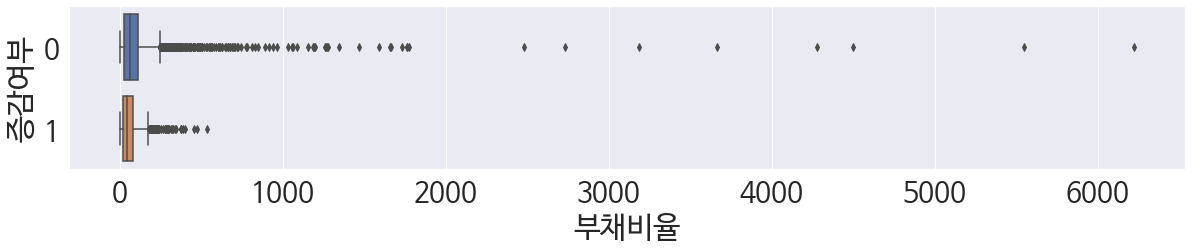

In [ ]:
# 이상치 제거전 데이터 시각화
plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = clean_type.astype({'증감여부':'str'}))
plt.show()

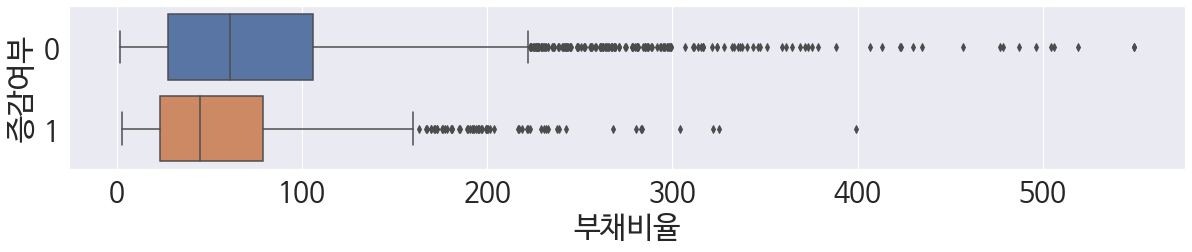

In [ ]:
# 이상치 처리가 된 데이터 시각화
plt.figure(figsize=(20,3))
sns.boxplot(x = col,y='증감여부', data = 이상치처리후.astype({'증감여부':'str'}))
plt.show()

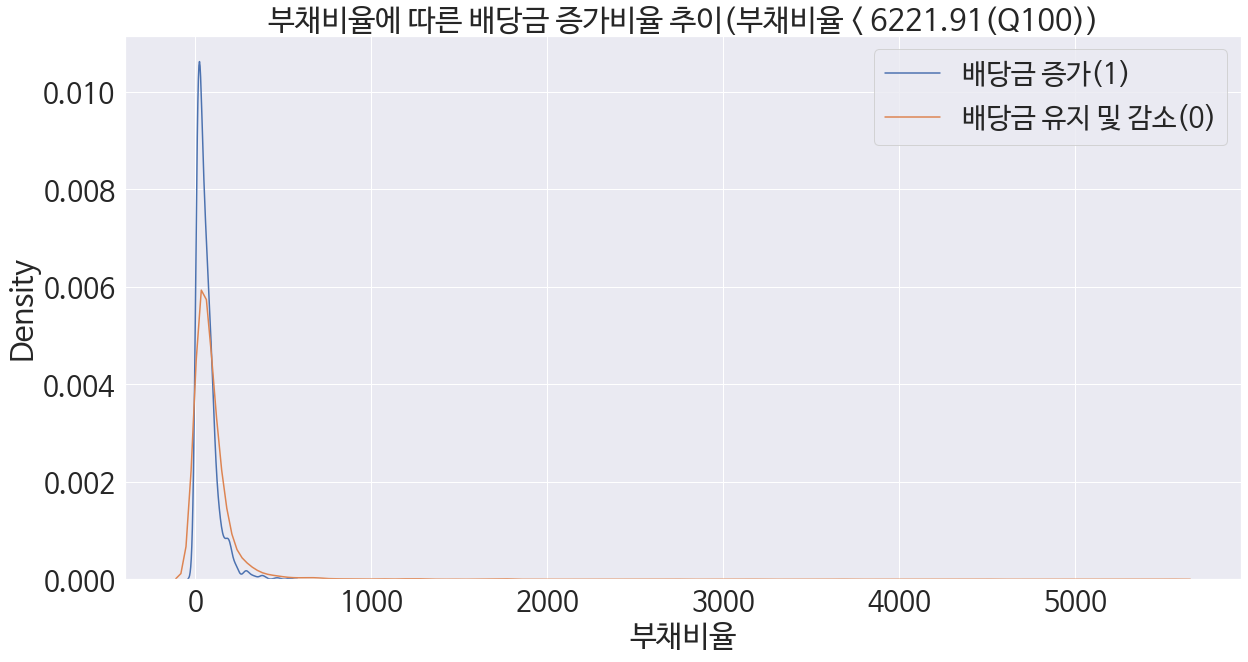

In [ ]:
# 이상치 제거전 데이터 시각화
k = 1.0
q = clean_type[col].quantile(k)
clean_type = clean_type.loc[clean_type[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(clean_type.loc[clean_type['증감여부']==1 ,col])
sns.kdeplot(clean_type.loc[clean_type['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

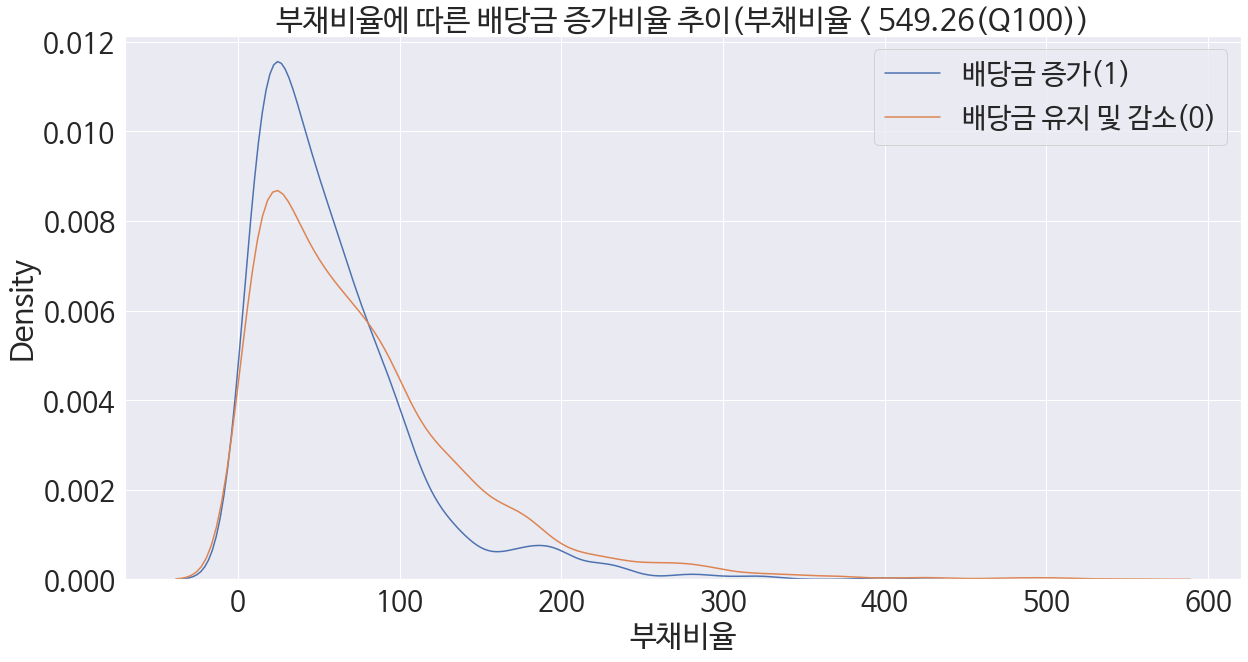

In [ ]:
# 이상치 처리가 된 데이터 시각화

k = 1.0
q = 이상치처리후[col].quantile(k)
이상치처리후 = 이상치처리후.loc[이상치처리후[col]<q]

plt.figure(figsize=(20,10))
sns.kdeplot(이상치처리후.loc[이상치처리후['증감여부']==1 ,col])
sns.kdeplot(이상치처리후.loc[이상치처리후['증감여부']==0 ,col])

plt.title(f'{col}에 따른 배당금 증가비율 추이({col} < {round(q,3)}(Q{int(k*100)}))')
plt.legend(['배당금 증가(1)', '배당금 유지 및 감소(0)'])

plt.show()

## 스케일링(RobustSclaer)

In [ ]:
from sklearn.preprocessing import RobustScaler

스케일링후 = 이상치처리후.copy()
독립변수 = 스케일링후.drop(['증감여부'], axis=1)

scaler = RobustScaler()
스케일링후.loc[:, 독립변수.columns] = scaler.fit_transform(독립변수)
스케일링후

,증감여부,매출채권회전율,재고자산회전율,이익잉여금,베타,매출액증가율,부채비율,당기순이익,유동비율,매출액,자기자본증가율,인당매출액,1대주주지분,종업원수,기업규모,KIS신용평점,기말시가총액합계,년도
0,0,-0.56,-0.24,-0.62,1.78,-0.07,0.10,-0.98,-0.21,0.04,-0.23,-0.68,-0.24,0.20,0.00,0.33,-0.03,-0.50
1,0,-0.21,0.19,0.17,-0.58,0.08,1.14,0.07,-0.53,0.28,-0.06,-0.11,-0.32,-0.47,1.00,0.67,-0.67,-0.50
2,0,0.86,-0.22,-0.31,-0.29,-0.17,-0.47,0.06,1.17,-0.02,0.65,-0.67,0.33,-0.19,0.00,-1.00,-0.61,-0.50
3,0,-0.75,-0.18,-0.71,0.46,-1.40,1.52,-0.21,-0.06,0.01,-4.07,-0.25,-0.60,-0.25,0.00,1.33,-0.16,-0.50
6,0,-0.00,-0.29,-0.69,-0.04,0.48,-0.15,-0.31,0.07,-0.03,-0.17,-0.38,-0.61,-0.26,0.00,-0.33,-0.34,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,0,-0.51,1.72,-0.75,0.73,0.36,0.84,-1.13,-0.15,0.12,-0.74,0.99,-0.23,-0.50,0.00,1.00,-0.58,0.50
6029,1,0.35,0.53,0.38,-0.24,0.27,0.68,0.89,-0.16,0.48,0.18,0.59,1.45,1.09,1.00,0.00,0.58,0.50
6030,1,0.01,0.08,0.06,2.54,-0.06,-0.34,0.61,0.24,0.40,0.12,0.29,0.63,0.79,1.00,-0.67,0.27,0.50
6031,0,1.86,-0.04,-0.66,-0.35,1.82,2.09,0.13,0.15,0.14,-1.92,0.39,1.46,-0.30,0.00,0.00,1.40,0.50


## 다중공선성 확인

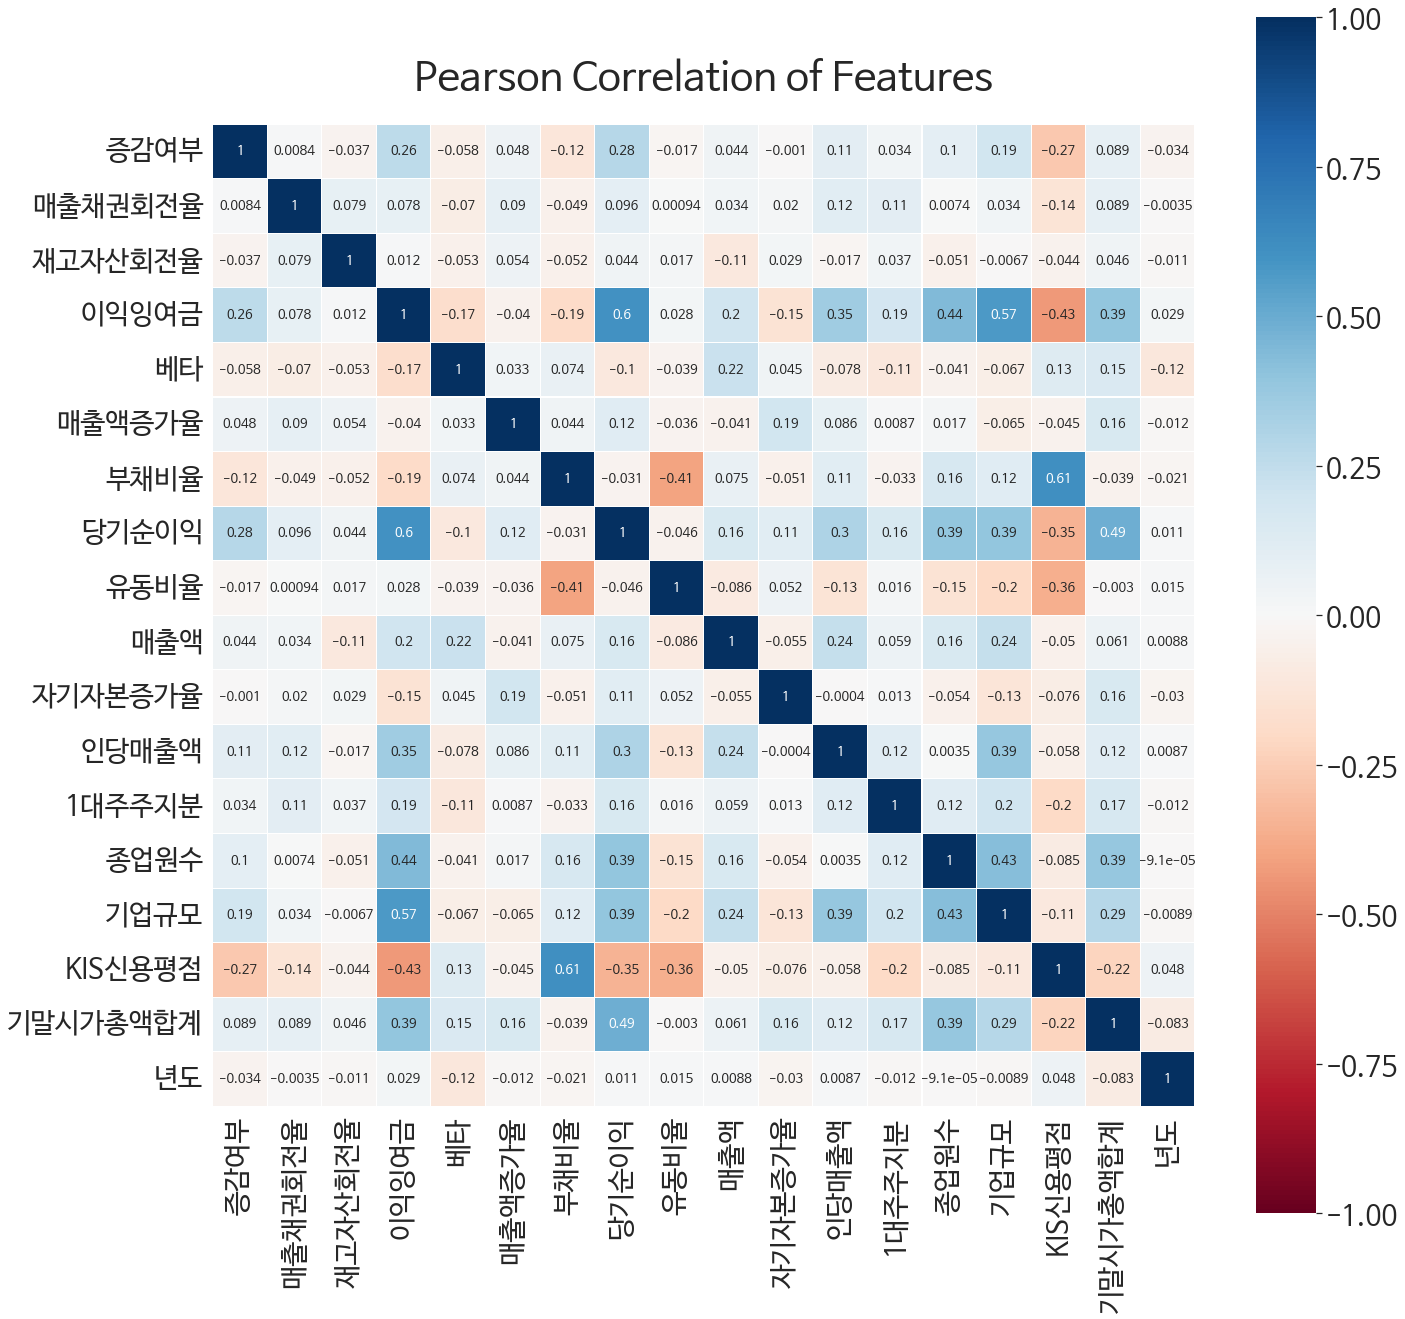

In [ ]:
heatmap_data = 스케일링후
colormap = plt.cm.RdBu
plt.figure(figsize=(22, 22))
plt.title('Pearson Correlation of Features', y=1.03, size=40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmin=-1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 13})
plt.show()

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop = 스케일링후.drop(['증감여부', '기업규모'], axis=1)

dfX = drop.values
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX, i) for i in range(dfX.shape[1])]
vif["features"] = drop.columns
vif_sort = vif.sort_values('VIF Factor', ascending=False)
vif_sort.T

,2,13,6,5,14,12,10,7,8,3,9,11,4,0,1,15
VIF Factor,2.48,2.23,2.03,1.93,1.69,1.62,1.38,1.27,1.25,1.23,1.21,1.12,1.12,1.09,1.09,1.03
features,이익잉여금,KIS신용평점,당기순이익,부채비율,기말시가총액합계,종업원수,인당매출액,유동비율,매출액,베타,자기자본증가율,1대주주지분,매출액증가율,매출채권회전율,재고자산회전율,년도


In [ ]:
# 스케일링후 데이터 엑셀로 만들기
스케일링후.to_excel('/content/drive/Shareddrives/경빅분/진짜 최종본/전처리후.xlsx')